In [166]:
# Standard imports
import numpy as np
import pandas as pd

# For statistical modeling
import scipy.stats as stats
from math import sqrt 

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To avoid deprecation and other warnings
import warnings
warnings.filterwarnings('ignore')

# For modeling
# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
# holt's linear trend model
from statsmodels.tsa.api import Holt
import statsmodels.api as sm

from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

# working with dates
from datetime import datetime

import os

import wrangle

url = 'https://www.fhwa.dot.gov/ohim/tvtw/archive/arch92u.htm'
df = pd.read_csv(url)

from requests import get
from bs4 import BeautifulSoup

url = 'https://codeup.com/data-science/math-in-data-science/'
headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
response = get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

s = get('https://www.fhwa.dot.gov/ohim/tvtw/archive/arch92u.htm')

soup.prettify()

response = get('https://www.fhwa.dot.gov/ohim/tvtw/archive/arch92u.htm')
soup = BeautifulSoup(response.content, 'html.parser')

soup.prettify()

soup.title.string

soup.get_text()

soup.select("footer")

In [2]:
#traffic = '/Users/everettclark/Downloads/TMS_traffic_counts/TMS_traffic_counts.csv'
#cspath = '/Users/everettclark/Downloads/archive (1)'
path2 = '/Users/everettclark/Downloads/archive (3)'

df = pd.read_csv(traffic)

df

df.isnull().sum()

df.info()

df.siteDescription.value_counts()

df.flowDirection.value_counts()

sns.scatterplot(x=df.laneNumber, y=df.trafficCount, hue=df.flowDirection)

df = pd.read_csv(f'{cspath}/esea_master_dmg_demos.part1.csv')

df

df.columns

df = pd.read_csv(f'{cspath}/map_data.csv')
df

## Age Specific Fertility Rates

In [3]:
asf = pd.read_csv(f'{path2}/age_specific_fertility_rates.csv')
print(asf.shape)
asf.drop(columns='country_code', inplace=True)
asf.head()

(15106, 13)


,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661


#### I have other info that I can use for birth/death

---

## Country Areas:

In [4]:
pd.read_csv(f'{path2}/country_names_area.csv').head(3)

,country_code,country_name,country_area
0,AF,Afghanistan,652230.0
1,AL,Albania,27398.0
2,AG,Algeria,2381741.0


#### Not needed

---

## Age 5 Midyear Populations:

In [5]:
mp5 = pd.read_csv(f'{path2}/midyear_population_5yr_age_sex.csv')
mp5.drop(columns='country_code', inplace=True)
print(mp5.shape)
mp5.sort_values(by='country_name').head()

(333080, 9)


,country_name,year,total_flag,starting_age,age_group_indicator,ending_age,midyear_population,midyear_population_male,midyear_population_female
279318,Afghanistan,2017,A,95,-,99,273,99,174
244100,Afghanistan,2040,A,15,-,19,5727704,2908688,2819016
193531,Afghanistan,2038,A,50,-,54,1873174,935379,937795
50334,Afghanistan,2025,A,0,-,4,6055219,3079206,2976013
127363,Afghanistan,1985,A,25,-,29,995440,510940,484500


#### Not going to use

---

## Midyear Population country code:

In [6]:
mpc = pd.read_csv(f'{path2}/midyear_population_age_country_code.csv')
mpc.sort_values(by='country_name').head(3)

,country_code,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,...,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100,age,permutation_role,population
2460213,AF,Afghanistan,2050,Male,100,699328,685484,678841,673365,668619,...,586,388,240,143,82,49,59,88,child,4827
2201225,AF,Afghanistan,2024,Male,100,653702,620418,604670,592017,579188,...,107,65,35,21,11,7,6,61,child,73743
65574,AF,Afghanistan,2014,Male,100,573665,528794,505300,487940,472797,...,70,43,24,10,6,4,3,29,child,220315


mpc.sort_values(by='country_name').head(15)

mpc.country_name.value_counts()

mpc[(mpc.country_name =='Afghanistan') & (mpc.sex == 'Male') & (mpc.year == 1979)].describe()

### Not using

---

## Midyear Population age sex:

In [7]:
mpa = pd.read_csv(f'{path2}/midyear_population_age_sex.csv')
mpa.drop(columns='country_code', inplace=True)
print(mpa.shape)
mpa.head(10)

(30280, 105)


,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_91,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100
0,Afghanistan,1979,Male,100,318425,299061,282850,268400,255599,244330,...,170,109,67,42,24,14,8,4,2,2
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,71,45,27,16,9,6,3,1,1,1
2,Afghanistan,1981,Male,100,278483,253006,228441,233548,226679,220238,...,169,108,67,41,24,14,8,4,2,2
3,Afghanistan,1982,Male,100,260493,226577,217475,198617,205456,200768,...,168,108,67,41,24,14,7,5,2,2
4,Afghanistan,1986,Male,100,288288,244977,225403,207463,204496,195268,...,159,108,67,40,25,13,8,4,2,2
5,Afghanistan,1988,Male,100,305181,262454,238563,218362,205439,190337,...,77,82,64,42,23,14,9,3,3,1
6,Afghanistan,1990,Male,100,324569,283502,259125,240125,223228,206840,...,92,52,31,32,24,14,7,5,3,1
7,Afghanistan,1992,Female,100,354761,310868,285194,268144,251210,232928,...,96,64,35,18,12,7,6,3,1,2
8,Afghanistan,1995,Female,100,447128,395670,363178,348926,332989,316915,...,101,59,36,26,17,8,4,3,0,3
9,Afghanistan,1996,Female,100,463943,411579,381929,356762,344747,330183,...,118,69,38,23,16,10,5,2,2,2


In [8]:
mpa[mpa.country_name == 'Afghanistan'].year.value_counts()

1979    2
1980    2
2012    2
2009    2
2005    2
       ..
2021    2
2019    2
2017    2
2016    2
2043    2
Name: year, Length: 72, dtype: int64

In [9]:
mpa[mpa.country_name == 'Afghanistan'].sort_values(by='year')

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_91,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100
0,Afghanistan,1979,Male,100,318425,299061,282850,268400,255599,244330,...,170,109,67,42,24,14,8,4,2,2
20162,Afghanistan,1979,Female,100,299276,284224,270908,258667,247496,237362,...,69,43,26,15,9,5,3,2,0,1
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,71,45,27,16,9,6,3,1,1,1
20163,Afghanistan,1980,Male,100,313513,270554,270040,260662,249193,239909,...,169,108,68,41,24,14,8,4,2,2
10055,Afghanistan,1981,Female,100,269398,245322,212463,219832,216190,211718,...,74,46,29,17,9,5,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20203,Afghanistan,2048,Male,100,697565,680954,673225,667942,662679,656964,...,1621,1149,797,515,322,196,123,74,42,48
10106,Afghanistan,2049,Female,100,670697,657731,650804,645829,641695,637315,...,3636,2599,1906,1368,921,599,382,247,156,199
10105,Afghanistan,2049,Male,100,698911,683655,675968,670535,665963,661149,...,1764,1195,828,562,355,217,128,79,47,52
10107,Afghanistan,2050,Male,100,699328,685484,678841,673365,668619,664476,...,1918,1303,864,586,388,240,143,82,49,59


In [10]:
mpa.columns

Index(['country_name', 'year', 'sex', 'max_age', 'population_age_0',
       'population_age_1', 'population_age_2', 'population_age_3',
       'population_age_4', 'population_age_5',
       ...
       'population_age_91', 'population_age_92', 'population_age_93',
       'population_age_94', 'population_age_95', 'population_age_96',
       'population_age_97', 'population_age_98', 'population_age_99',
       'population_age_100'],
      dtype='object', length=105)

In [11]:
mpa.max_age.min()

80

In [12]:
mpa.iloc[:1]

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_91,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100
0,Afghanistan,1979,Male,100,318425,299061,282850,268400,255599,244330,...,170,109,67,42,24,14,8,4,2,2


mpa.iloc[:1].columns[5:]

In [13]:
mpa.columns

Index(['country_name', 'year', 'sex', 'max_age', 'population_age_0',
       'population_age_1', 'population_age_2', 'population_age_3',
       'population_age_4', 'population_age_5',
       ...
       'population_age_91', 'population_age_92', 'population_age_93',
       'population_age_94', 'population_age_95', 'population_age_96',
       'population_age_97', 'population_age_98', 'population_age_99',
       'population_age_100'],
      dtype='object', length=105)

In [14]:
mpa.loc[0][4]

318425

In [15]:
mpa.loc[0][4:105].values.sum()

7997234

In [16]:
mpa.iloc[1:2]

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_91,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,71,45,27,16,9,6,3,1,1,1


In [17]:
mpa.loc[1:2]

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_91,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,71,45,27,16,9,6,3,1,1,1
2,Afghanistan,1981,Male,100,278483,253006,228441,233548,226679,220238,...,169,108,67,41,24,14,8,4,2,2


In [18]:
mpa.loc[1][3:5].values

array([100, 303582], dtype=object)

In [19]:
mpa.index

RangeIndex(start=0, stop=30280, step=1)

for val in mpa.index:
    print('1')

In [20]:
mpa.iloc[:][2:3]

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_91,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100
2,Afghanistan,1981,Male,100,278483,253006,228441,233548,226679,220238,...,169,108,67,41,24,14,8,4,2,2


In [21]:
mpa.loc[:][4:105].values

array([['Afghanistan', 1986, 'Male', ..., 4, 2, 2],
       ['Afghanistan', 1988, 'Male', ..., 3, 3, 1],
       ['Afghanistan', 1990, 'Male', ..., 5, 3, 1],
       ...,
       ['Armenia', 2006, 'Male', ..., 30, 17, 27],
       ['Armenia', 2006, 'Female', ..., 66, 40, 54],
       ['Armenia', 2008, 'Female', ..., 70, 42, 60]], dtype=object)

In [22]:
(mpa.population_age_0 + mpa.population_age_1 + mpa.population_age_2 + mpa.population_age_3 + mpa.population_age_4
 + mpa.population_age_5 + mpa.population_age_6 + mpa.population_age_7 + mpa.population_age_8 + mpa.population_age_9
 + mpa.population_age_10 + mpa.population_age_11 + mpa.population_age_12 + mpa.population_age_13 + mpa.population_age_14
 + mpa.population_age_15 + mpa.population_age_16 + mpa.population_age_17 + mpa.population_age_18 + mpa.population_age_19
 + mpa.population_age_21 + mpa.population_age_22 + mpa.population_age_23 + mpa.population_age_24 + mpa.population_age_25
 + mpa.population_age_26 + mpa.population_age_27 + mpa.population_age_28 + mpa.population_age_29 + mpa.population_age_30
 + mpa.population_age_31 + mpa.population_age_32 + mpa.population_age_33 + mpa.population_age_34 + mpa.population_age_35
 + mpa.population_age_36 + mpa.population_age_37 + mpa.population_age_38 + mpa.population_age_39 + mpa.population_age_40
 + mpa.population_age_41 + mpa.population_age_42 + mpa.population_age_43 + mpa.population_age_44 + mpa.population_age_45
 + mpa.population_age_46 + mpa.population_age_47 + mpa.population_age_48 + mpa.population_age_49 + mpa.population_age_50 
 + mpa.population_age_51 + mpa.population_age_52 + mpa.population_age_53 + mpa.population_age_54 + mpa.population_age_55
 + mpa.population_age_56 + mpa.population_age_57 + mpa.population_age_58 + mpa.population_age_59 + mpa.population_age_60 
 + mpa.population_age_61 + mpa.population_age_62 + mpa.population_age_63 + mpa.population_age_64 + mpa.population_age_65
 + mpa.population_age_66 + mpa.population_age_67 + mpa.population_age_68 + mpa.population_age_69 + mpa.population_age_70 
 + mpa.population_age_71 + mpa.population_age_72 + mpa.population_age_73 + mpa.population_age_74 + mpa.population_age_75
 + mpa.population_age_76 + mpa.population_age_77 + mpa.population_age_78 + mpa.population_age_79 + mpa.population_age_80 
 + mpa.population_age_81 + mpa.population_age_82 + mpa.population_age_83 + mpa.population_age_84 + mpa.population_age_85
 + mpa.population_age_86 + mpa.population_age_87 + mpa.population_age_88 + mpa.population_age_89 + mpa.population_age_90 
 + mpa.population_age_91 + mpa.population_age_92 + mpa.population_age_93 + mpa.population_age_94 + mpa.population_age_95
 + mpa.population_age_96 + mpa.population_age_97 + mpa.population_age_98 + mpa.population_age_99 + mpa.population_age_100 
)

0         7845191
1         7176787
2         6883693
3         6328157
4         6580806
           ...   
30275    10327492
30276    10917624
30277    10632126
30278    11429468
30279    11106344
Length: 30280, dtype: int64

In [23]:
#mpa.loc[:][4:105].values.sum()
mpa['total'] = (mpa.population_age_0 + mpa.population_age_1 + mpa.population_age_2 + mpa.population_age_3 + mpa.population_age_4
 + mpa.population_age_5 + mpa.population_age_6 + mpa.population_age_7 + mpa.population_age_8 + mpa.population_age_9
 + mpa.population_age_10 + mpa.population_age_11 + mpa.population_age_12 + mpa.population_age_13 + mpa.population_age_14
 + mpa.population_age_15 + mpa.population_age_16 + mpa.population_age_17 + mpa.population_age_18 + mpa.population_age_19
 + mpa.population_age_21 + mpa.population_age_22 + mpa.population_age_23 + mpa.population_age_24 + mpa.population_age_25
 + mpa.population_age_26 + mpa.population_age_27 + mpa.population_age_28 + mpa.population_age_29 + mpa.population_age_30
 + mpa.population_age_31 + mpa.population_age_32 + mpa.population_age_33 + mpa.population_age_34 + mpa.population_age_35
 + mpa.population_age_36 + mpa.population_age_37 + mpa.population_age_38 + mpa.population_age_39 + mpa.population_age_40
 + mpa.population_age_41 + mpa.population_age_42 + mpa.population_age_43 + mpa.population_age_44 + mpa.population_age_45
 + mpa.population_age_46 + mpa.population_age_47 + mpa.population_age_48 + mpa.population_age_49 + mpa.population_age_50 
 + mpa.population_age_51 + mpa.population_age_52 + mpa.population_age_53 + mpa.population_age_54 + mpa.population_age_55
 + mpa.population_age_56 + mpa.population_age_57 + mpa.population_age_58 + mpa.population_age_59 + mpa.population_age_60 
 + mpa.population_age_61 + mpa.population_age_62 + mpa.population_age_63 + mpa.population_age_64 + mpa.population_age_65
 + mpa.population_age_66 + mpa.population_age_67 + mpa.population_age_68 + mpa.population_age_69 + mpa.population_age_70 
 + mpa.population_age_71 + mpa.population_age_72 + mpa.population_age_73 + mpa.population_age_74 + mpa.population_age_75
 + mpa.population_age_76 + mpa.population_age_77 + mpa.population_age_78 + mpa.population_age_79 + mpa.population_age_80 
 + mpa.population_age_81 + mpa.population_age_82 + mpa.population_age_83 + mpa.population_age_84 + mpa.population_age_85
 + mpa.population_age_86 + mpa.population_age_87 + mpa.population_age_88 + mpa.population_age_89 + mpa.population_age_90 
 + mpa.population_age_91 + mpa.population_age_92 + mpa.population_age_93 + mpa.population_age_94 + mpa.population_age_95
 + mpa.population_age_96 + mpa.population_age_97 + mpa.population_age_98 + mpa.population_age_99 + mpa.population_age_100 
)

In [24]:
mpa

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100,total
0,Afghanistan,1979,Male,100,318425,299061,282850,268400,255599,244330,...,109,67,42,24,14,8,4,2,2,7845191
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,45,27,16,9,6,3,1,1,1,7176787
2,Afghanistan,1981,Male,100,278483,253006,228441,233548,226679,220238,...,108,67,41,24,14,8,4,2,2,6883693
3,Afghanistan,1982,Male,100,260493,226577,217475,198617,205456,200768,...,108,67,41,24,14,7,5,2,2,6328157
4,Afghanistan,1986,Male,100,288288,244977,225403,207463,204496,195268,...,108,67,40,25,13,8,4,2,2,6580806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30275,Zimbabwe,2039,Female,100,248936,244492,241255,238273,235361,232523,...,4396,3591,2894,2301,1795,1372,1032,759,1548,10327492
30276,Zimbabwe,2040,Male,100,258379,253811,250468,247358,244272,241152,...,1336,1052,815,623,471,348,251,178,322,10917624
30277,Zimbabwe,2041,Female,100,253900,249550,246469,243553,240623,237613,...,4877,4009,3244,2580,2021,1557,1177,870,1842,10632126
30278,Zimbabwe,2043,Male,100,266028,261622,258335,255347,252432,249353,...,1499,1163,898,682,509,372,268,190,362,11429468


In [25]:
mpa.loc[1][3:]

max_age                   100
population_age_0       303582
population_age_1       253596
population_age_2       255259
population_age_3       249053
                       ...   
population_age_97           3
population_age_98           1
population_age_99           1
population_age_100          1
total                 7176787
Name: 1, Length: 103, dtype: object

In [26]:
# Get sum of all rows as a new row in Dataframe
total = mpa.sum()
total.name = 'Total'
# Assign sum of all rows of DataFrame as a new Row
df = mpa.append(total.transpose())
print(df)

                                            country_name      year  \
0                                            Afghanistan      1979   
1                                            Afghanistan      1980   
2                                            Afghanistan      1981   
3                                            Afghanistan      1982   
4                                            Afghanistan      1986   
...                                                  ...       ...   
30276                                           Zimbabwe      2040   
30277                                           Zimbabwe      2041   
30278                                           Zimbabwe      2043   
30279                                           Zimbabwe      2044   
Total  AfghanistanAfghanistanAfghanistanAfghanistanAf...  61065808   

                                                     sex  max_age  \
0                                                   Male      100   
1                    

In [27]:
df

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100,total
0,Afghanistan,1979,Male,100,318425,299061,282850,268400,255599,244330,...,109,67,42,24,14,8,4,2,2,7845191
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,45,27,16,9,6,3,1,1,1,7176787
2,Afghanistan,1981,Male,100,278483,253006,228441,233548,226679,220238,...,108,67,41,24,14,8,4,2,2,6883693
3,Afghanistan,1982,Male,100,260493,226577,217475,198617,205456,200768,...,108,67,41,24,14,7,5,2,2,6328157
4,Afghanistan,1986,Male,100,288288,244977,225403,207463,204496,195268,...,108,67,40,25,13,8,4,2,2,6580806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30276,Zimbabwe,2040,Male,100,258379,253811,250468,247358,244272,241152,...,1336,1052,815,623,471,348,251,178,322,10917624
30277,Zimbabwe,2041,Female,100,253900,249550,246469,243553,240623,237613,...,4877,4009,3244,2580,2021,1557,1177,870,1842,10632126
30278,Zimbabwe,2043,Male,100,266028,261622,258335,255347,252432,249353,...,1499,1163,898,682,509,372,268,190,362,11429468
30279,Zimbabwe,2044,Female,100,260995,257010,254038,251164,248348,245503,...,6053,4857,3864,3074,2425,1879,1428,1066,2345,11106344


In [28]:
mpa.sum(axis=1, numeric_only=True)

0        15844504
1        14495940
2        13903488
3        12780643
4        13295378
           ...   
30275    20875000
30276    22061740
30277    21485590
30278    23086640
30279    22434438
Length: 30280, dtype: int64

for year in mpa.year:
    

In [30]:
m = mpa.dropna()

In [31]:
m.isnull().sum()

country_name          0
year                  0
sex                   0
max_age               0
population_age_0      0
                     ..
population_age_97     0
population_age_98     0
population_age_99     0
population_age_100    0
total                 0
Length: 106, dtype: int64

In [32]:
mpa.drop

<bound method DataFrame.drop of       country_name  year     sex  max_age  population_age_0  population_age_1  \
0      Afghanistan  1979    Male      100            318425            299061   
1      Afghanistan  1980  Female      100            303582            253596   
2      Afghanistan  1981    Male      100            278483            253006   
3      Afghanistan  1982    Male      100            260493            226577   
4      Afghanistan  1986    Male      100            288288            244977   
...            ...   ...     ...      ...               ...               ...   
30275     Zimbabwe  2039  Female      100            248936            244492   
30276     Zimbabwe  2040    Male      100            258379            253811   
30277     Zimbabwe  2041  Female      100            253900            249550   
30278     Zimbabwe  2043    Male      100            266028            261622   
30279     Zimbabwe  2044  Female      100            260995            257010

In [40]:
pd.pivot_table(mpa, index='country_name', columns='year')

max_age                                               ...  \
year              1950 1951 1952 1953 1954 1955 1956 1957 1958 1959  ...   
country_name                                                         ...   
Afghanistan        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Albania            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Algeria            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
American Samoa     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Andorra            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
West Bank          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Western Sahara     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Yemen              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Zambia             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Zimbabwe           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                     total                                                  \
year                  2041        2042        2043        2044        2045   
country_name                                                                 
Afghanistan     27254065.5  27698965.5  28147745.0  28598064.5  29048747.5   
Albania          1471157.5   1463252.5   1455293.5   1447263.0   1439196.0   
Algeria         25794072.0  25994608.0  26192334.0  26385681.0  26573172.5   
American Samoa     24673.0     24593.0     24529.0     24475.5     24434.5   
Andorra            40012.0     39757.0     39482.5     39190.0     38879.5   
...                    ...         ...         ...         ...         ...   
West Bank        1904820.0   1924629.5   1944195.5   1963492.0   1982518.0   
Western Sahara    498290.0    507037.5    515782.0    524530.0    533266.0   
Yemen           20472995.5  20733464.0  20991463.5  21246458.5  21497994.5   
Zambia          15256939.0  15658082.0  16066142.0  16480934.5  16902240.0   
Zimbabwe        10859297.5  11022541.5  11187784.0  11354836.0  11523394.0   

                                                                            
year                  2046        2047        2048        2049        2050  
country_name                                                                
Afghanistan     29499782.5  29951107.0  30402680.5  30853747.5  31303231.0  
Albania          1431114.5   1422972.0   1414727.5   1406338.5   1397812.5  
Algeria         26753428.5  26925467.0  27088264.5  27240685.0  27381808.5  
American Samoa     24404.5     24386.0     24379.5     24386.0     24397.5  
Andorra            38550.0     38204.0     37841.5     37462.5     37073.0  
...                    ...         ...         ...         ...         ...  
West Bank        2001222.0   2019615.0   2037729.0   2055523.0   2072967.0  
Western Sahara    541981.0    550682.5    559374.0    568049.0    576694.0  
Yemen           21743891.0  21984308.0  22221251.0  22454459.0  22683770.5  
Zambia          17330159.0  17764800.5  18205960.5  18653418.5  19106938.0  
Zimbabwe        11692902.0  11862985.0  12033490.0  12204259.5  12375101.5  

[228 rows x 10403 columns]

In [41]:
mpa.head(3)

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100,total
0,Afghanistan,1979,Male,100,318425,299061,282850,268400,255599,244330,...,109,67,42,24,14,8,4,2,2,7845191
1,Afghanistan,1980,Female,100,303582,253596,255259,249053,239924,232073,...,45,27,16,9,6,3,1,1,1,7176787
2,Afghanistan,1981,Male,100,278483,253006,228441,233548,226679,220238,...,108,67,41,24,14,8,4,2,2,6883693


In [42]:
mpa.year.value_counts(sort=False)

1979     94
1980    144
1981    180
1982    198
1986    242
       ... 
1956      8
1961      8
1952      4
1958      8
1959      8
Name: year, Length: 101, dtype: int64

In [43]:
mpa.sort_values('year').head()

,country_name,year,sex,max_age,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,...,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100,total
4552,Djibouti,1950,Female,94,1476,1315,1235,1183,1141,1105,...,1,0,1,0,0,0,0,0,0,38808
4551,Djibouti,1950,Male,95,1493,1323,1246,1195,1153,1118,...,0,0,0,1,0,0,0,0,0,38937
4066,Bhutan,1950,Male,100,3512,3081,2842,2691,2568,2466,...,2,1,0,0,1,0,0,0,1,82163
4067,Bhutan,1950,Female,100,3353,2956,2725,2580,2460,2362,...,1,1,1,0,0,0,0,0,1,78572
14217,Bhutan,1951,Female,100,3385,3034,2800,2647,2528,2425,...,1,1,1,0,0,0,0,0,1,80628


In [44]:
mpa[mpa.year > 2009].drop(columns=['max_age'])

,country_name,year,sex,population_age_0,population_age_1,population_age_2,population_age_3,population_age_4,population_age_5,population_age_6,...,population_age_92,population_age_93,population_age_94,population_age_95,population_age_96,population_age_97,population_age_98,population_age_99,population_age_100,total
21,Afghanistan,2010,Male,534585,488693,472361,449534,439298,430266,417748,...,152,71,45,36,19,11,6,3,4,14479174
22,Afghanistan,2011,Male,543710,499027,474734,464591,443835,434880,426816,...,168,99,45,28,21,12,6,3,4,14787889
23,Afghanistan,2016,Male,594602,550593,526827,509048,493521,479291,466263,...,185,106,69,43,27,16,8,3,4,16518856
24,Afghanistan,2016,Female,573956,533579,510479,493185,478137,464358,451771,...,303,184,115,73,47,26,14,7,7,16070379
25,Afghanistan,2017,Male,604331,561362,538083,520273,504379,490038,476677,...,194,123,68,44,26,16,9,4,4,16905116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30275,Zimbabwe,2039,Female,248936,244492,241255,238273,235361,232523,229842,...,4396,3591,2894,2301,1795,1372,1032,759,1548,10327492
30276,Zimbabwe,2040,Male,258379,253811,250468,247358,244272,241152,238067,...,1336,1052,815,623,471,348,251,178,322,10917624
30277,Zimbabwe,2041,Female,253900,249550,246469,243553,240623,237613,234533,...,4877,4009,3244,2580,2021,1557,1177,870,1842,10632126
30278,Zimbabwe,2043,Male,266028,261622,258335,255347,252432,249353,246114,...,1499,1163,898,682,509,372,268,190,362,11429468


In [45]:
pd.pivot_table(mpa[mpa.year > 2009], index='country_name', columns='year')

max_age                                                   \
year              2010   2011   2012   2013   2014   2015   2016   2017   
country_name                                                              
Afghanistan      100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
Albania          100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
Algeria          100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
American Samoa    95.5   96.5   97.5   96.0   97.0   97.5   98.0   98.5   
Andorra          100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
...                ...    ...    ...    ...    ...    ...    ...    ...   
West Bank        100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
Western Sahara    98.0   99.0   99.5  100.0  100.0  100.0  100.0  100.0   
Yemen            100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
Zambia           100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
Zimbabwe         100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   

                              ...       total                          \
year             2018   2019  ...        2041        2042        2043   
country_name                  ...                                       
Afghanistan     100.0  100.0  ...  27254065.5  27698965.5  28147745.0   
Albania         100.0  100.0  ...   1471157.5   1463252.5   1455293.5   
Algeria         100.0  100.0  ...  25794072.0  25994608.0  26192334.0   
American Samoa   97.5   97.5  ...     24673.0     24593.0     24529.0   
Andorra         100.0  100.0  ...     40012.0     39757.0     39482.5   
...               ...    ...  ...         ...         ...         ...   
West Bank       100.0  100.0  ...   1904820.0   1924629.5   1944195.5   
Western Sahara  100.0   99.5  ...    498290.0    507037.5    515782.0   
Yemen           100.0  100.0  ...  20472995.5  20733464.0  20991463.5   
Zambia          100.0  100.0  ...  15256939.0  15658082.0  16066142.0   
Zimbabwe        100.0  100.0  ...  10859297.5  11022541.5  11187784.0   

                                                                            \
year                  2044        2045        2046        2047        2048   
country_name                                                                 
Afghanistan     28598064.5  29048747.5  29499782.5  29951107.0  30402680.5   
Albania          1447263.0   1439196.0   1431114.5   1422972.0   1414727.5   
Algeria         26385681.0  26573172.5  26753428.5  26925467.0  27088264.5   
American Samoa     24475.5     24434.5     24404.5     24386.0     24379.5   
Andorra            39190.0     38879.5     38550.0     38204.0     37841.5   
...                    ...         ...         ...         ...         ...   
West Bank        1963492.0   1982518.0   2001222.0   2019615.0   2037729.0   
Western Sahara    524530.0    533266.0    541981.0    550682.5    559374.0   
Yemen           21246458.5  21497994.5  21743891.0  21984308.0  22221251.0   
Zambia          16480934.5  16902240.0  17330159.0  17764800.5  18205960.5   
Zimbabwe        11354836.0  11523394.0  11692902.0  11862985.0  12033490.0   

                                        
year                  2049        2050  
country_name                            
Afghanistan     30853747.5  31303231.0  
Albania          1406338.5   1397812.5  
Algeria         27240685.0  27381808.5  
American Samoa     24386.0     24397.5  
Andorra            37462.5     37073.0  
...                    ...         ...  
West Bank        2055523.0   2072967.0  
Western Sahara    568049.0    576694.0  
Yemen           22454459.0  22683770.5  
Zambia          18653418.5  19106938.0  
Zimbabwe        12204259.5  12375101.5  

[228 rows x 4223 columns]

In [46]:
s = mpa[mpa.year > 2009].drop(columns=['max_age'])

In [47]:
s.columns

Index(['country_name', 'year', 'sex', 'population_age_0', 'population_age_1',
       'population_age_2', 'population_age_3', 'population_age_4',
       'population_age_5', 'population_age_6',
       ...
       'population_age_92', 'population_age_93', 'population_age_94',
       'population_age_95', 'population_age_96', 'population_age_97',
       'population_age_98', 'population_age_99', 'population_age_100',
       'total'],
      dtype='object', length=105)

In [48]:
d= s.drop(columns=['population_age_0', 'population_age_1','population_age_2', 'population_age_3', 'population_age_4',
                 'population_age_5', 'population_age_6', 'population_age_7', 'population_age_8','population_age_9', 
                 'population_age_10', 'population_age_11','population_age_12', 'population_age_13', 'population_age_14',
                 'population_age_15', 'population_age_16', 'population_age_17','population_age_18', 'population_age_19', 
                 'population_age_20', 'population_age_21', 'population_age_22', 'population_age_23','population_age_24',
                 'population_age_25', 'population_age_26','population_age_27', 'population_age_28', 'population_age_29',
                 'population_age_30', 'population_age_31', 'population_age_32','population_age_33', 'population_age_34', 
                 'population_age_35','population_age_36', 'population_age_37', 'population_age_38','population_age_39', 
                 'population_age_40', 'population_age_41','population_age_42', 'population_age_43', 'population_age_44',
                 'population_age_45', 'population_age_46', 'population_age_47','population_age_48', 'population_age_49', 
                 'population_age_50','population_age_51', 'population_age_52', 'population_age_53','population_age_54', 
                 'population_age_55', 'population_age_56','population_age_57', 'population_age_58', 'population_age_59',
                 'population_age_60', 'population_age_61', 'population_age_62','population_age_63', 'population_age_64', 
                 'population_age_65','population_age_66', 'population_age_67', 'population_age_68','population_age_69', 
                 'population_age_70', 'population_age_71','population_age_72', 'population_age_73', 'population_age_74',
                 'population_age_75', 'population_age_76', 'population_age_77','population_age_78', 'population_age_79', 
                 'population_age_80','population_age_81', 'population_age_82', 'population_age_83','population_age_84', 
                 'population_age_85', 'population_age_86','population_age_87', 'population_age_88', 'population_age_89',
                 'population_age_90', 'population_age_91', 'population_age_92','population_age_93', 'population_age_94', 
                 'population_age_95','population_age_96', 'population_age_97', 'population_age_98','population_age_99', 
                 'population_age_100'])

In [49]:
d = d.sort_values(by=['country_name', 'year'])
d

,country_name,year,sex,total
21,Afghanistan,2010,Male,14479174
20181,Afghanistan,2010,Female,14040537
22,Afghanistan,2011,Male,14787889
10077,Afghanistan,2011,Female,14348327
10078,Afghanistan,2012,Female,14669005
...,...,...,...,...
20158,Zimbabwe,2048,Male,12305769
10054,Zimbabwe,2049,Female,11927001
20159,Zimbabwe,2049,Male,12481518
20160,Zimbabwe,2050,Male,12656912


In [50]:
d.reset_index(drop=True, inplace=True)

In [51]:
d

,country_name,year,sex,total
0,Afghanistan,2010,Male,14479174
1,Afghanistan,2010,Female,14040537
2,Afghanistan,2011,Male,14787889
3,Afghanistan,2011,Female,14348327
4,Afghanistan,2012,Female,14669005
...,...,...,...,...
18691,Zimbabwe,2048,Male,12305769
18692,Zimbabwe,2049,Female,11927001
18693,Zimbabwe,2049,Male,12481518
18694,Zimbabwe,2050,Male,12656912


In [52]:
d.country_name.value_counts()

Afghanistan    82
Netherlands    82
New Zealand    82
Nicaragua      82
Niger          82
               ..
Grenada        82
Guam           82
Guatemala      82
Guernsey       82
Zimbabwe       82
Name: country_name, Length: 228, dtype: int64

In [53]:
#df.groupby('date')['hours'].sum()
d.groupby('country_name').count()


,year,sex,total
country_name,,,
Afghanistan,82,82,82
Albania,82,82,82
Algeria,82,82,82
American Samoa,82,82,82
Andorra,82,82,82
...,...,...,...
West Bank,82,82,82
Western Sahara,82,82,82
Yemen,82,82,82


In [54]:
d.loc[1]

country_name    Afghanistan
year                   2010
sex                  Female
total              14040537
Name: 1, dtype: object

In [55]:
d.loc[2]

country_name    Afghanistan
year                   2011
sex                    Male
total              14787889
Name: 2, dtype: object

In [56]:
d.loc[1] + d.loc[2]

country_name    AfghanistanAfghanistan
year                              4021
sex                         FemaleMale
total                         28828426
dtype: object

In [57]:
d

,country_name,year,sex,total
0,Afghanistan,2010,Male,14479174
1,Afghanistan,2010,Female,14040537
2,Afghanistan,2011,Male,14787889
3,Afghanistan,2011,Female,14348327
4,Afghanistan,2012,Female,14669005
...,...,...,...,...
18691,Zimbabwe,2048,Male,12305769
18692,Zimbabwe,2049,Female,11927001
18693,Zimbabwe,2049,Male,12481518
18694,Zimbabwe,2050,Male,12656912


for val in d.country_name:
    for y in d.year:
        if d.year 

In [59]:
pd.pivot_table(
    data=d,
    index='country_name',
    columns=['year', 'sex'],
    values='total')

year                2010                2011                2012            \
sex               Female      Male    Female      Male    Female      Male   
country_name                                                                 
Afghanistan     14040537  14479174  14348327  14787889  14669005  15109933   
Albania          1477193   1447568   1481918   1450984   1486985   1454846   
Algeria         17409564  17824289  17749325  18179582  18092053  18537678   
American Samoa     27037     27356     26892     27136     26733     26918   
Andorra            40468     43351     40569     43430     40730     43530   
...                  ...       ...       ...       ...       ...       ...   
West Bank        1155964   1196392   1178581   1219894   1201650   1243851   
Western Sahara    242961    238857    250685    246499    258462    254204   
Yemen           11207435  11514977  11545275  11854640  11896339  12207929   
Zambia           6398037   6390702   6585392   6577939   6777752   6769918   
Zimbabwe         5983060   5435215   6134703   5689551   6322263   6012933   

year                2013                2014            ...      2046  \
sex               Female      Male    Female      Male  ...    Female   
country_name                                            ...             
Afghanistan     15004739  15447458  15343682  15788014  ...  29335634   
Albania          1493042   1460320   1498303   1464482  ...   1466277   
Algeria         18445031  18906157  18805433  19282026  ...  26565116   
American Samoa     26610     26736     26540     26614  ...     25257   
Andorra            40871     43616     41024     43689  ...     38950   
...                  ...       ...       ...       ...  ...       ...   
West Bank        1225161   1268241   1249015   1292970  ...   1981970   
Western Sahara    266311    261974    274216    269805  ...    546560   
Yemen           12248141  12563103  12597819  12918190  ...  21689986   
Zambia           6975898   6967486   7179410   7170635  ...  17359229   
Zimbabwe         6528015   6356334   6749792   6717130  ...  11431788   

year                          2047                2048                2049  \
sex                 Male    Female      Male    Female      Male    Female   
country_name                                                                 
Afghanistan     29663931  29794195  30108019  30253363  30551998  30712403   
Albania          1395952   1458123   1387821   1449777   1379678   1441204   
Algeria         26941741  26746667  27104267  26919316  27257213  27081927   
American Samoa     23552     25254     23518     25261     23498     25283   
Andorra            38150     38659     37749     38348     37335     38018   
...                  ...       ...       ...       ...       ...       ...   
West Bank        2020474   2001037   2038193   2019846   2055612   2038357   
Western Sahara    537402    555394    545971    564220    554528    573040   
Yemen           21797796  21938072  22030544  22183120  22259382  22424905   
Zambia          17301089  17795111  17734490  18237583  18174338  18686447   
Zimbabwe        11954016  11596096  12129874  11761211  12305769  11927001   

year                          2050            
sex                 Male    Female      Male  
country_name                                  
Afghanistan     30995092  31170250  31436212  
Albania          1371473   1432405   1363220  
Algeria         27399443  27233581  27530036  
American Samoa     23489     25301     23494  
Andorra            36907     37674     36472  
...                  ...       ...       ...  
West Bank        2072689   2056535   2089399  
Western Sahara    563058    581829    571559  
Yemen           22484013  22663281  22704260  
Zambia          18620390  19141450  19072426  
Zimbabwe        12481518  12093291  12656912  

[228 rows x 82 columns]

In [60]:
g = pd.pivot_table(
    data=d,
    index='country_name',
    columns=['year', 'sex'],
    values='total')

In [61]:
g.head()

year                2010                2011                2012            \
sex               Female      Male    Female      Male    Female      Male   
country_name                                                                 
Afghanistan     14040537  14479174  14348327  14787889  14669005  15109933   
Albania          1477193   1447568   1481918   1450984   1486985   1454846   
Algeria         17409564  17824289  17749325  18179582  18092053  18537678   
American Samoa     27037     27356     26892     27136     26733     26918   
Andorra            40468     43351     40569     43430     40730     43530   

year                2013                2014            ...      2046  \
sex               Female      Male    Female      Male  ...    Female   
country_name                                            ...             
Afghanistan     15004739  15447458  15343682  15788014  ...  29335634   
Albania          1493042   1460320   1498303   1464482  ...   1466277   
Algeria         18445031  18906157  18805433  19282026  ...  26565116   
American Samoa     26610     26736     26540     26614  ...     25257   
Andorra            40871     43616     41024     43689  ...     38950   

year                          2047                2048                2049  \
sex                 Male    Female      Male    Female      Male    Female   
country_name                                                                 
Afghanistan     29663931  29794195  30108019  30253363  30551998  30712403   
Albania          1395952   1458123   1387821   1449777   1379678   1441204   
Algeria         26941741  26746667  27104267  26919316  27257213  27081927   
American Samoa     23552     25254     23518     25261     23498     25283   
Andorra            38150     38659     37749     38348     37335     38018   

year                          2050            
sex                 Male    Female      Male  
country_name                                  
Afghanistan     30995092  31170250  31436212  
Albania          1371473   1432405   1363220  
Algeria         27399443  27233581  27530036  
American Samoa     23489     25301     23494  
Andorra            36907     37674     36472  

[5 rows x 82 columns]

In [62]:
g.columns[1:2]

MultiIndex([(2010, 'Male')],
           names=['year', 'sex'])

In [63]:
g.columns

MultiIndex([(2010, 'Female'),
            (2010,   'Male'),
            (2011, 'Female'),
            (2011,   'Male'),
            (2012, 'Female'),
            (2012,   'Male'),
            (2013, 'Female'),
            (2013,   'Male'),
            (2014, 'Female'),
            (2014,   'Male'),
            (2015, 'Female'),
            (2015,   'Male'),
            (2016, 'Female'),
            (2016,   'Male'),
            (2017, 'Female'),
            (2017,   'Male'),
            (2018, 'Female'),
            (2018,   'Male'),
            (2019, 'Female'),
            (2019,   'Male'),
            (2020, 'Female'),
            (2020,   'Male'),
            (2021, 'Female'),
            (2021,   'Male'),
            (2022, 'Female'),
            (2022,   'Male'),
            (2023, 'Female'),
            (2023,   'Male'),
            (2024, 'Female'),
            (2024,   'Male'),
            (2025, 'Female'),
            (2025,   'Male'),
            (2026, 'Female'),
          

In [64]:
gt = g.T
gt

country_name  Afghanistan  Albania   Algeria  American Samoa  Andorra  \
year sex                                                                
2010 Female      14040537  1477193  17409564           27037    40468   
     Male        14479174  1447568  17824289           27356    43351   
2011 Female      14348327  1481918  17749325           26892    40569   
     Male        14787889  1450984  18179582           27136    43430   
2012 Female      14669005  1486985  18092053           26733    40730   
...                   ...      ...       ...             ...      ...   
2048 Male        30551998  1379678  27257213           23498    37335   
2049 Female      30712403  1441204  27081927           25283    38018   
     Male        30995092  1371473  27399443           23489    36907   
2050 Female      31170250  1432405  27233581           25301    37674   
     Male        31436212  1363220  27530036           23494    36472   

country_name    Angola  Anguilla  Antigua and Barbuda  Argentina  Armenia  \
year sex                                                                    
2010 Female    8269988      7493                44840   20617464  1570396   
     Male      8448349      7041                40546   20073311  1443169   
2011 Female    8511422      7686                45443   20819808  1565736   
     Male      8697509      7184                41039   20279947  1444389   
2012 Female    8756925      7885                46048   21028757  1564190   
...                ...       ...                  ...        ...      ...   
2048 Male     21806220     11860                55882   26288886  1255349   
2049 Female   21822238     14458                64828   26863725  1227568   
     Male     22266355     11962                56087   26381792  1244747   
2050 Female   22284937     14599                65091   26952425  1213730   
     Male     22730759     12064                56270   26469164  1233887   

country_name  ...  Venezuela   Vietnam  Virgin Islands British  \
year sex      ...                                                
2010 Female   ...   14057850  44035455                   15069   
     Male     ...   13888671  43696395                   14096   
2011 Female   ...   14258790  44501750                   15454   
     Male     ...   14096600  44232816                   14426   
2012 Female   ...   14457980  44964008                   15891   
...           ...        ...       ...                     ...   
2048 Male     ...   19451331  54952198                   26740   
2049 Female   ...   19630533  54906402                   31201   
     Male     ...   19511652  54978519                   27055   
2050 Female   ...   19686606  54945707                   31590   
     Male     ...   19567008  54991215                   27373   

country_name  Virgin Islands U.S.  Wallis and Futuna  West Bank  \
year sex                                                          
2010 Female                 55727               7459    1155964   
     Male                   49279               7577    1196392   
2011 Female                 55542               7481    1178581   
     Male                   48993               7627    1219894   
2012 Female                 55362               7494    1201650   
...                           ...                ...        ...   
2048 Male                   30384               7867    2055612   
2049 Female                 39468               7620    2038357   
     Male                   29913               7848    2072689   
2050 Female                 38942               7610    2056535   
     Male                   29452               7827    2089399   

country_name  Western Sahara     Yemen    Zambia  Zimbabwe  
year sex                                                    
2010 Female           242961  11207435   6398037   5983060  
     Male             238857  11514977   6390702   5435215  
2011 Female           250685  11545275   6585392   6134703  
     Male   

In [65]:
gt.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Venezuela', 'Vietnam', 'Virgin Islands British', 'Virgin Islands U.S.',
       'Wallis and Futuna', 'West Bank', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country_name', length=228)

In [66]:
gt.columns[0]

'Afghanistan'

In [67]:
gt.Afghanistan

year  sex   
2010  Female    14040537
      Male      14479174
2011  Female    14348327
      Male      14787889
2012  Female    14669005
                  ...   
2048  Male      30551998
2049  Female    30712403
      Male      30995092
2050  Female    31170250
      Male      31436212
Name: Afghanistan, Length: 82, dtype: int64

In [68]:
gt.Afghanistan[0:2].sum()

28519711

In [69]:
gt.index[0:2]

MultiIndex([(2010, 'Female'),
            (2010,   'Male')],
           names=['year', 'sex'])

In [70]:
gt

country_name  Afghanistan  Albania   Algeria  American Samoa  Andorra  \
year sex                                                                
2010 Female      14040537  1477193  17409564           27037    40468   
     Male        14479174  1447568  17824289           27356    43351   
2011 Female      14348327  1481918  17749325           26892    40569   
     Male        14787889  1450984  18179582           27136    43430   
2012 Female      14669005  1486985  18092053           26733    40730   
...                   ...      ...       ...             ...      ...   
2048 Male        30551998  1379678  27257213           23498    37335   
2049 Female      30712403  1441204  27081927           25283    38018   
     Male        30995092  1371473  27399443           23489    36907   
2050 Female      31170250  1432405  27233581           25301    37674   
     Male        31436212  1363220  27530036           23494    36472   

country_name    Angola  Anguilla  Antigua and Barbuda  Argentina  Armenia  \
year sex                                                                    
2010 Female    8269988      7493                44840   20617464  1570396   
     Male      8448349      7041                40546   20073311  1443169   
2011 Female    8511422      7686                45443   20819808  1565736   
     Male      8697509      7184                41039   20279947  1444389   
2012 Female    8756925      7885                46048   21028757  1564190   
...                ...       ...                  ...        ...      ...   
2048 Male     21806220     11860                55882   26288886  1255349   
2049 Female   21822238     14458                64828   26863725  1227568   
     Male     22266355     11962                56087   26381792  1244747   
2050 Female   22284937     14599                65091   26952425  1213730   
     Male     22730759     12064                56270   26469164  1233887   

country_name  ...  Venezuela   Vietnam  Virgin Islands British  \
year sex      ...                                                
2010 Female   ...   14057850  44035455                   15069   
     Male     ...   13888671  43696395                   14096   
2011 Female   ...   14258790  44501750                   15454   
     Male     ...   14096600  44232816                   14426   
2012 Female   ...   14457980  44964008                   15891   
...           ...        ...       ...                     ...   
2048 Male     ...   19451331  54952198                   26740   
2049 Female   ...   19630533  54906402                   31201   
     Male     ...   19511652  54978519                   27055   
2050 Female   ...   19686606  54945707                   31590   
     Male     ...   19567008  54991215                   27373   

country_name  Virgin Islands U.S.  Wallis and Futuna  West Bank  \
year sex                                                          
2010 Female                 55727               7459    1155964   
     Male                   49279               7577    1196392   
2011 Female                 55542               7481    1178581   
     Male                   48993               7627    1219894   
2012 Female                 55362               7494    1201650   
...                           ...                ...        ...   
2048 Male                   30384               7867    2055612   
2049 Female                 39468               7620    2038357   
     Male                   29913               7848    2072689   
2050 Female                 38942               7610    2056535   
     Male                   29452               7827    2089399   

country_name  Western Sahara     Yemen    Zambia  Zimbabwe  
year sex                                                    
2010 Female           242961  11207435   6398037   5983060  
     Male             238857  11514977   6390702   5435215  
2011 Female           250685  11545275   6585392   6134703  
     Male   

In [71]:
gt.columns.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia T

d = {'col1': [1, 2], 'col2': [3, 4]}

In [72]:
gt.Afghanistan[0:2].sum()

28519711

In [73]:
for col in gt:
    print(gt[col][0:2].sum())

28519711
2924761
35233853
54393
83819
16718337
14534
85386
40690775
3013565
103198
21219214
8346877
9107148
304906
1161479
143763603
281356
9534002
10732446
307851
8883202
67441
684033
9745745
3828078
1984361
192478072
387947
7296833
15926654
52380184
8943846
497208
14106875
20408104
33292052
49549
4745593
10345313
16459948
1306917823
43378050
693167
4159239
68435864
11287
4429280
20610223
4364229
11086236
141153
1083788
10418626
5447432
723777
71518
9641492
14514051
79465311
5928960
638397
5261176
1283192
84375129
48209
860392
5288024
64140880
263828
1514187
1718259
1471066
4817966
80671636
23121710
28397
10640773
56651
105831
156744
13253194
63934
10130644
1533841
731417
9355464
7821064
6943425
9866604
313012
1151880027
239268141
75037830
29956012
4564522
82844
7252228
60129328
2783745
126352766
91939
6366366
16750525
40033416
97376
23918695
48660108
1775415
2506071
5291823
6233023
2082820
4408806
1878256
3619052
5986624
35718
3043611
503173
558760
2041142
20428501
14898132
27800138


In [74]:
a = {'country':gt.columns.tolist(), '2010':gt.Afghanistan[0:2].sum()}
pd.DataFrame(data=a)

,country,2010
0,Afghanistan,28519711
1,Albania,28519711
2,Algeria,28519711
3,American Samoa,28519711
4,Andorra,28519711
...,...,...
223,West Bank,28519711
224,Western Sahara,28519711
225,Yemen,28519711
226,Zambia,28519711


---

In [75]:
v = pd.pivot_table(d, index='country_name', columns=['year', 'sex'])
v

total                                                    \
year                2010                2011                2012             
sex               Female      Male    Female      Male    Female      Male   
country_name                                                                 
Afghanistan     14040537  14479174  14348327  14787889  14669005  15109933   
Albania          1477193   1447568   1481918   1450984   1486985   1454846   
Algeria         17409564  17824289  17749325  18179582  18092053  18537678   
American Samoa     27037     27356     26892     27136     26733     26918   
Andorra            40468     43351     40569     43430     40730     43530   
...                  ...       ...       ...       ...       ...       ...   
West Bank        1155964   1196392   1178581   1219894   1201650   1243851   
Western Sahara    242961    238857    250685    246499    258462    254204   
Yemen           11207435  11514977  11545275  11854640  11896339  12207929   
Zambia           6398037   6390702   6585392   6577939   6777752   6769918   
Zimbabwe         5983060   5435215   6134703   5689551   6322263   6012933   

                                                        ...            \
year                2013                2014            ...      2046   
sex               Female      Male    Female      Male  ...    Female   
country_name                                            ...             
Afghanistan     15004739  15447458  15343682  15788014  ...  29335634   
Albania          1493042   1460320   1498303   1464482  ...   1466277   
Algeria         18445031  18906157  18805433  19282026  ...  26565116   
American Samoa     26610     26736     26540     26614  ...     25257   
Andorra            40871     43616     41024     43689  ...     38950   
...                  ...       ...       ...       ...  ...       ...   
West Bank        1225161   1268241   1249015   1292970  ...   1981970   
Western Sahara    266311    261974    274216    269805  ...    546560   
Yemen           12248141  12563103  12597819  12918190  ...  21689986   
Zambia           6975898   6967486   7179410   7170635  ...  17359229   
Zimbabwe         6528015   6356334   6749792   6717130  ...  11431788   

                                                                            \
year                          2047                2048                2049   
sex                 Male    Female      Male    Female      Male    Female   
country_name                                                                 
Afghanistan     29663931  29794195  30108019  30253363  30551998  30712403   
Albania          1395952   1458123   1387821   1449777   1379678   1441204   
Algeria         26941741  26746667  27104267  26919316  27257213  27081927   
American Samoa     23552     25254     23518     25261     23498     25283   
Andorra            38150     38659     37749     38348     37335     38018   
...                  ...       ...       ...       ...       ...       ...   
West Bank        2020474   2001037   2038193   2019846   2055612   2038357   
Western Sahara    537402    555394    545971    564220    554528    573040   
Yemen           21797796  21938072  22030544  22183120  22259382  22424905   
Zambia          17301089  17795111  17734490  18237583  18174338  18686447   
Zimbabwe        11954016  11596096  12129874  11761211  12305769  11927001   

                                              
year                          2050            
sex                 Male    Female      Male  
country_name                                  
Afghanistan     30995092  31170250  31436212  
Albania          1371473   1432405   1363220  
Algeria         27399443  27233581  27530036  
American Samoa     23489     25301     23494  
Andorra            36907     37674     36472  
...                  ...       ...       ...  
West Bank        2072689   2056535   2089399  
Western Sahara    563058    581829    571559  
Yemen           2

In [76]:
v.columns

MultiIndex([('total', 2010, 'Female'),
            ('total', 2010,   'Male'),
            ('total', 2011, 'Female'),
            ('total', 2011,   'Male'),
            ('total', 2012, 'Female'),
            ('total', 2012,   'Male'),
            ('total', 2013, 'Female'),
            ('total', 2013,   'Male'),
            ('total', 2014, 'Female'),
            ('total', 2014,   'Male'),
            ('total', 2015, 'Female'),
            ('total', 2015,   'Male'),
            ('total', 2016, 'Female'),
            ('total', 2016,   'Male'),
            ('total', 2017, 'Female'),
            ('total', 2017,   'Male'),
            ('total', 2018, 'Female'),
            ('total', 2018,   'Male'),
            ('total', 2019, 'Female'),
            ('total', 2019,   'Male'),
            ('total', 2020, 'Female'),
            ('total', 2020,   'Male'),
            ('total', 2021, 'Female'),
            ('total', 2021,   'Male'),
            ('total', 2022, 'Female'),
            ('total', 202

v.columns[('total', 2010, 'Female'),
            ('total', 2010,   'Male')]

In [79]:
x = pd.pivot_table(d, index='country_name', columns='year')
x

total                                                  \
year                  2010        2011        2012        2013        2014   
country_name                                                                 
Afghanistan     14259855.5  14568108.0  14889469.0  15226098.5  15565848.0   
Albania          1462380.5   1466451.0   1470915.5   1476681.0   1481392.5   
Algeria         17616926.5  17964453.5  18314865.5  18675594.0  19043729.5   
American Samoa     27196.5     27014.0     26825.5     26673.0     26577.0   
Andorra            41909.5     41999.5     42130.0     42243.5     42356.5   
...                    ...         ...         ...         ...         ...   
West Bank        1176178.0   1199237.5   1222750.5   1246701.0   1270992.5   
Western Sahara    240909.0    248592.0    256333.0    264142.5    272010.5   
Yemen           11361206.0  11699957.5  12052134.0  12405622.0  12758004.5   
Zambia           6394369.5   6581665.5   6773835.0   6971692.0   7175022.5   
Zimbabwe         5709137.5   5912127.0   6167598.0   6442174.5   6733461.0   

                                                                            \
year                  2015        2016        2017        2018        2019   
country_name                                                                 
Afghanistan     15923050.0  16294617.5  16679741.0  17074551.0  17480524.0   
Albania          1484374.5   1489512.5   1496387.0   1502560.5   1507522.5   
Algeria         19422195.5  19811980.5  20178216.0  20532794.5  20880927.0   
American Samoa     26540.5     26552.5     26598.5     26626.5     26627.5   
Andorra            42417.5     42459.5     42471.5     42457.0     42393.0   
...                    ...         ...         ...         ...         ...   
West Bank        1295477.5   1320021.0   1344611.0   1369075.0   1394540.5   
Western Sahara    279900.5    287836.5    295795.5    303801.5    311829.5   
Yemen           13091135.5  13411928.5  13725973.0  14032401.0  14332241.5   
Zambia           7383890.5   7601258.5   7827846.0   8060887.0   8299406.0   
Zimbabwe         6962917.5   7121622.5   7280970.0   7440412.0   7599104.5   

                ...                                                  \
year            ...        2041        2042        2043        2044   
country_name    ...                                                   
Afghanistan     ...  27254065.5  27698965.5  28147745.0  28598064.5   
Albania         ...   1471157.5   1463252.5   1455293.5   1447263.0   
Algeria         ...  25794072.0  25994608.0  26192334.0  26385681.0   
American Samoa  ...     24673.0     24593.0     24529.0     24475.5   
Andorra         ...     40012.0     39757.0     39482.5     39190.0   
...             ...         ...         ...         ...         ...   
West Bank       ...   1904820.0   1924629.5   1944195.5   1963492.0   
Western Sahara  ...    498290.0    507037.5    515782.0    524530.0   
Yemen           ...  20472995.5  20733464.0  20991463.5  21246458.5   
Zambia          ...  15256939.0  15658082.0  16066142.0  16480934.5   
Zimbabwe        ...  10859297.5  11022541.5  11187784.0  11354836.0   

                                                                            \
year                  2045        2046        2047        2048        2049   
country_name                                                                 
Afghanistan     29048747.5  29499782.5  29951107.0  30402680.5  30853747.5   
Albania          1439196.0   1431114.5   1422972.0   1414727.5   1406338.5   
Algeria         26573172.5  26753428.5  26925467.0  27088264.5  27240685.0   
American Samoa     24434.5     24404.5     24386.0     24379.5     24386.0   
Andorra            38879.5     38550.0     38204.0     37841.5     37462.5   
...                    ...         ...         ...         ...         ...   
West Bank        1982518.0   2001222.0   2019615.0   2037729.0   2055523.0   
Western Sahara    533266.0    541981.0    550682.5    559374

In [80]:
x.columns

MultiIndex([('total', 2010),
            ('total', 2011),
            ('total', 2012),
            ('total', 2013),
            ('total', 2014),
            ('total', 2015),
            ('total', 2016),
            ('total', 2017),
            ('total', 2018),
            ('total', 2019),
            ('total', 2020),
            ('total', 2021),
            ('total', 2022),
            ('total', 2023),
            ('total', 2024),
            ('total', 2025),
            ('total', 2026),
            ('total', 2027),
            ('total', 2028),
            ('total', 2029),
            ('total', 2030),
            ('total', 2031),
            ('total', 2032),
            ('total', 2033),
            ('total', 2034),
            ('total', 2035),
            ('total', 2036),
            ('total', 2037),
            ('total', 2038),
            ('total', 2039),
            ('total', 2040),
            ('total', 2041),
            ('total', 2042),
            ('total', 2043),
            ('

df.loc[df['column_name'] == some_value]
#### To select rows whose column value is in an iterable, some_values, use isin:
df.loc[df['column_name'].isin(some_values)]
#### Combine multiple conditions with &:

df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

In [81]:
d.loc[df['year'] == 2010]

,country_name,year,sex,total
21,Afghanistan,2020,Female,17676342
65,Afghanistan,2042,Male,27888359
66,Afghanistan,2043,Male,28331371
152,Albania,2045,Male,1404094
195,Algeria,2025,Male,22886883
...,...,...,...,...
18396,Western Sahara,2024,Male,349920
18446,Western Sahara,2049,Male,563058
18533,Zambia,2010,Female,6398037
18576,Zambia,2032,Male,11964232


d.loc[(d['country_name']) & (d['year'])]

In [82]:
pd.pivot_table(d,index='country_name', columns='year',values='total')

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14259855.5,14568108.0,14889469.0,15226098.5,15565848.0,15923050.0,16294617.5,16679741.0,17074551.0,17480524.0,...,27254065.5,27698965.5,28147745.0,28598064.5,29048747.5,29499782.5,29951107.0,30402680.5,30853747.5,31303231.0
Albania,1462380.5,1466451.0,1470915.5,1476681.0,1481392.5,1484374.5,1489512.5,1496387.0,1502560.5,1507522.5,...,1471157.5,1463252.5,1455293.5,1447263.0,1439196.0,1431114.5,1422972.0,1414727.5,1406338.5,1397812.5
Algeria,17616926.5,17964453.5,18314865.5,18675594.0,19043729.5,19422195.5,19811980.5,20178216.0,20532794.5,20880927.0,...,25794072.0,25994608.0,26192334.0,26385681.0,26573172.5,26753428.5,26925467.0,27088264.5,27240685.0,27381808.5
American Samoa,27196.5,27014.0,26825.5,26673.0,26577.0,26540.5,26552.5,26598.5,26626.5,26627.5,...,24673.0,24593.0,24529.0,24475.5,24434.5,24404.5,24386.0,24379.5,24386.0,24397.5
Andorra,41909.5,41999.5,42130.0,42243.5,42356.5,42417.5,42459.5,42471.5,42457.0,42393.0,...,40012.0,39757.0,39482.5,39190.0,38879.5,38550.0,38204.0,37841.5,37462.5,37073.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,1176178.0,1199237.5,1222750.5,1246701.0,1270992.5,1295477.5,1320021.0,1344611.0,1369075.0,1394540.5,...,1904820.0,1924629.5,1944195.5,1963492.0,1982518.0,2001222.0,2019615.0,2037729.0,2055523.0,2072967.0
Western Sahara,240909.0,248592.0,256333.0,264142.5,272010.5,279900.5,287836.5,295795.5,303801.5,311829.5,...,498290.0,507037.5,515782.0,524530.0,533266.0,541981.0,550682.5,559374.0,568049.0,576694.0
Yemen,11361206.0,11699957.5,12052134.0,12405622.0,12758004.5,13091135.5,13411928.5,13725973.0,14032401.0,14332241.5,...,20472995.5,20733464.0,20991463.5,21246458.5,21497994.5,21743891.0,21984308.0,22221251.0,22454459.0,22683770.5


---

## Midyear Population:

In [83]:
mp1 = pd.read_csv(f'{path2}/midyear_population.csv')
mp1.drop(columns='country_code', inplace=True)
print(mp1.shape)
mp1.head(10)

(23028, 3)


,country_name,year,midyear_population
0,Slovenia,2013,1992690
1,Slovenia,2025,1907560
2,Slovenia,2024,1917093
3,Slovenia,2023,1926279
4,Slovenia,2022,1935080
5,Slovenia,2021,1943453
6,Slovenia,2020,1951358
7,Slovenia,2019,1958778
8,Slovenia,2018,1965706
9,Slovenia,2017,1972126


mp1[(mp1.country_name == 'Norway') &(mp1.year == 2036)]

In [84]:
for col in mp1:
    print(mp1[col].value_counts())
    print('--------')

Slovenia               101
Bangladesh             101
Ireland                101
Virgin Islands U.S.    101
Gambia The             101
                      ... 
Montserrat             101
Panama                 101
Macau                  101
Nepal                  101
Solomon Islands        101
Name: country_name, Length: 228, dtype: int64
--------
2013    228
1999    228
1952    228
1953    228
1954    228
       ... 
2046    228
2047    228
2048    228
2049    228
1975    228
Name: year, Length: 101, dtype: int64
--------
8500        4
8300        4
107580      3
7852        3
7791        3
           ..
27087450    1
27087181    1
27082378    1
27073044    1
193000      1
Name: midyear_population, Length: 22880, dtype: int64
--------


pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

In [85]:
fp = pd.pivot_table(mp1, index='country_name', columns='year',  values='midyear_population').T
fp

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1950,8150368,1227156,8892718,19100,6176,4117617,5219,45816,17150336,1355269,...,5009006,25348144,6243,26900,6962,771165,9057,4777089,2553000,2853151
1951,8284473,1254119,9073304,19500,6310,4173095,5261,46901,17517342,1379204,...,5217020,25793577,6245,27700,7050,774512,10133,4869125,2611000,2950941
1952,8425333,1282697,9279525,19300,5866,4232095,5303,47961,17876956,1416722,...,5439568,26246839,6304,27900,7138,777872,11336,4963829,2672000,3080907
1953,8573217,1314608,9531710,19200,5591,4293840,5345,48976,18230816,1455777,...,5674259,26724094,6398,26900,7228,781247,12682,5061153,2734000,3190967
1954,8728408,1352982,9611093,19500,5503,4357527,5387,49967,18580559,1505668,...,5918702,27210027,6496,27200,7319,784637,14187,5162494,2800000,3307273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,60165568,2894917,54237145,49384,77686,42180459,25984,120990,53356869,2566094,...,39266094,110860296,56782,73004,15735,4071177,1103223,44199728,35368942,23829993
2047,61075545,2877563,54565705,49332,76998,43092389,26239,121508,53560693,2542324,...,39403764,110977307,57491,71952,15701,4107818,1120822,44682648,36255336,24170434
2048,61985148,2859983,54877585,49303,76280,44014878,26490,122004,53755439,2518074,...,39531525,111068418,58200,70922,15668,4143794,1138386,45157387,37155040,24512164


In [86]:
fp.reset_index(inplace=True)

In [87]:
fp.year = pd.to_datetime(fp.year, format='%Y')

In [88]:
fp.set_index('year', inplace=True)

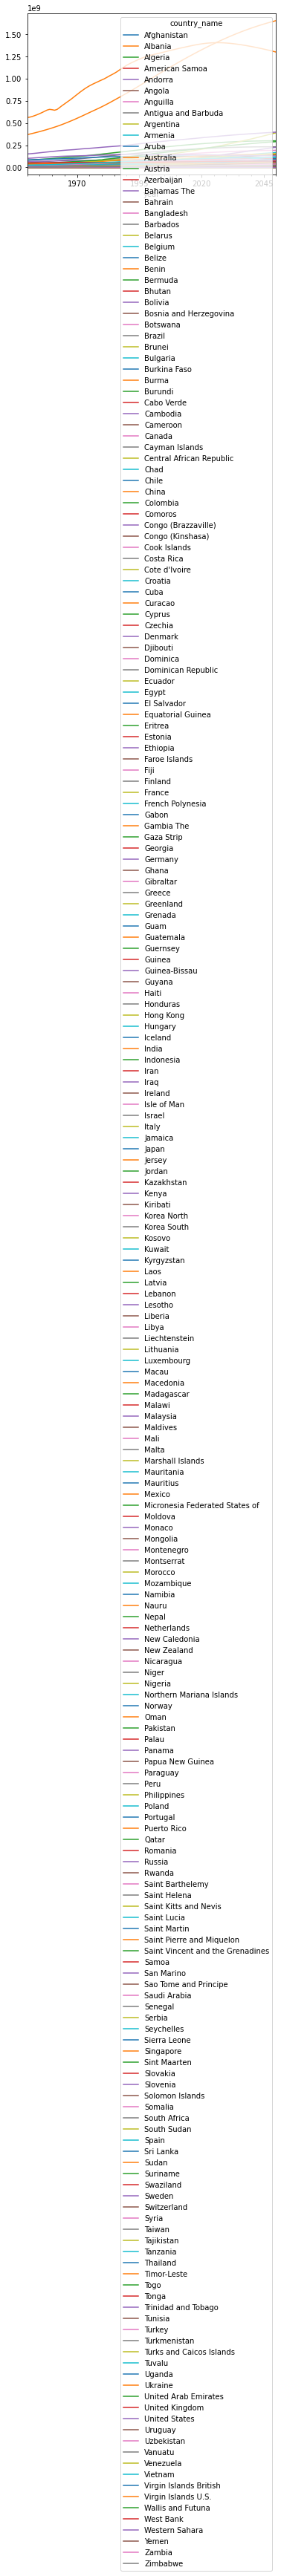

In [89]:
fp.resample('y').mean().plot()
plt.show()

#### Not going to use

---

## Birth Death Growth Rates

In [90]:
bd = pd.read_csv(f'{path2}/birth_death_growth_rates.csv')
bd.drop(columns='country_code', inplace=True)
print(bd.shape)
bd.head()

(15109, 7)


,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
0,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682
1,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444
2,Slovenia,2023,7.43,12.41,0.31,-0.498,-0.467
3,Slovenia,2024,7.35,12.55,0.31,-0.520,-0.489
4,Slovenia,2025,7.30,12.68,0.30,-0.538,-0.508


In [91]:
bd.tail(3)

,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
15106,Solomon Islands,1998,35.98,4.70,-2.45,3.128,2.884
15107,Solomon Islands,1997,36.44,4.79,-2.31,3.165,2.934
15108,Solomon Islands,1995,37.17,4.97,-2.01,3.220,3.019


---

## Mortality Life Expentancy

In [92]:
mo = pd.read_csv(f'{path2}/mortality_life_expectancy.csv')
# I don't need all these columns, I'll take the average of each
mo.drop(columns={'country_code','infant_mortality_male','infant_mortality_female','life_expectancy_male',
                'life_expectancy_female','mortality_rate_under5_male','mortality_rate_under5_female',
                 'mortality_rate_1to4_male','mortality_rate_1to4_female'}, inplace=True)
print(mo.shape)
mo.head(10)

(15106, 6)


,country_name,year,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
0,Slovenia,2036,3.39,80.90,3.93,0.54
1,Slovenia,2022,3.76,79.11,4.43,0.68
2,Slovenia,2023,3.73,79.26,4.39,0.67
3,Slovenia,2024,3.70,79.40,4.35,0.65
4,Slovenia,2025,3.67,79.55,4.31,0.64
5,Slovenia,2026,3.64,79.68,4.26,0.63
6,Slovenia,2027,3.61,79.81,4.23,0.63
7,Slovenia,2028,3.58,79.94,4.19,0.61
8,Slovenia,2029,3.56,80.08,4.15,0.60
9,Slovenia,2030,3.53,80.21,4.12,0.60


In [93]:
mo.tail(3)

,country_name,year,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
15103,Solomon Islands,1998,27.45,70.7,34.71,7.46
15104,Solomon Islands,1997,28.38,70.4,35.97,7.81
15105,Solomon Islands,1995,30.33,69.8,38.64,8.57


In [94]:
mo.country_name.value_counts()

Bhutan                 101
Djibouti               101
Nigeria                 98
Guinea                  96
Cambodia                89
                      ... 
Virgin Islands U.S.     51
South Sudan             43
Sudan                   43
Puerto Rico             41
United States           37
Name: country_name, Length: 228, dtype: int64

In [95]:
mo[mo.country_name == 'Bhutan']
print(mo[mo.country_name == 'Bhutan'].year.min())
print(mo[mo.country_name == 'Bhutan'].year.max())

1950
2050


In [96]:
mo[mo.country_name == 'United States']
print(mo[mo.country_name == 'United States'].year.min())
print(mo[mo.country_name == 'United States'].year.max())

2014
2050


In [97]:
len(mo[mo.year ==2014])

228

In [98]:
len(mo[mo.year == 2050])

228

In [99]:
mo[mo.year == 2014]

,country_name,year,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
53,Slovenia,2014,4.04,77.83,4.83,0.80
116,Latvia,2014,5.44,74.01,6.81,1.37
178,Mongolia,2014,23.15,68.98,27.78,4.73
241,Mauritania,2014,56.06,62.28,84.47,30.10
276,Liberia,2014,69.19,58.21,102.53,35.82
...,...,...,...,...,...,...
14818,Azerbaijan,2014,26.67,71.91,29.59,3.00
14878,Saint Pierre and Miquelon,2014,6.95,80.26,7.94,0.99
14933,Northern Mariana Islands,2014,5.50,77.64,6.81,1.32
14959,Chad,2014,90.30,49.44,151.71,67.50


In [100]:
(mo.year.value_counts() == 228).sum()

37

---

## World Population

In [101]:
world = pd.read_csv('/Users/everettclark/Downloads/World Population Live Dataset.csv')
world.drop(columns='CCA3', inplace=True)
print(world.shape)
world.sort_values(by='Name').head()

(234, 14)


,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
35,Afghanistan,41129,38972,33753,28190,19543,10695,12487,10753,652230,63.0587,1.03,0.52%,36
137,Albania,2842,2867,2882,2913,3182,3295,2942,2325,28748,98.8702,1.00,0.04%,138
33,Algeria,44903,43452,39543,35856,30775,25518,18739,13796,2381741,18.8531,1.02,0.56%,34
212,American Samoa,44,46,51,55,58,48,33,27,199,222.4774,0.98,0.00%,213
202,Andorra,80,78,72,72,66,54,36,20,468,170.5641,1.01,0.00%,203


In [102]:
world

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,4,5,5,5,5,11,11,11,102,43.0392,0.99,0.00%,230
230,Falkland Islands,4,4,3,3,3,2,2,2,12173,0.3105,1.00,0.00%,231
231,Niue,2,2,2,2,2,3,4,5,260,7.4385,1.00,0.00%,232
232,Tokelau,2,2,1,1,2,2,2,2,12,155.9167,1.01,0.00%,233


### Rank is by World Population Percentage
#### - Population is in the thousands
#### - Area is accurate (when I checked US sqkm)
#### - Density (Vatican is .44 sqkm and has a lower density than it should)

---
---

### Birth and Mortality merge

In [103]:
bam = pd.merge(bd,mo)
print(bam.shape)
bam.head()

(15106, 11)


,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
0,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682,3.39,80.90,3.93,0.54
1,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444,3.76,79.11,4.43,0.68
2,Slovenia,2023,7.43,12.41,0.31,-0.498,-0.467,3.73,79.26,4.39,0.67
3,Slovenia,2024,7.35,12.55,0.31,-0.520,-0.489,3.70,79.40,4.35,0.65
4,Slovenia,2025,7.30,12.68,0.30,-0.538,-0.508,3.67,79.55,4.31,0.64


In [104]:
bd.head(2)

,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
0,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682
1,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444


In [105]:
mo.head(2)

,country_name,year,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
0,Slovenia,2036,3.39,80.90,3.93,0.54
1,Slovenia,2022,3.76,79.11,4.43,0.68


## Predict the top and bottom 5 populated countries?

### .csv list:

### Not needed:
##### - country_names_area.csv

##### - midyear_population_5yr_age_sex.csv

##### - midyear_population_age_country_code.csv

##### - age_specific_fertility_rates.csv
(15106, 13)

##### - midyear_population.csv (mp1)
(23028, 3)

#### Data Dictionary:

- Data dictionary.txt 

### Using:
##### - midyear_population_age_sex.csv
(30280, 105)
##### - mortality_life_expectancy.csv (mo)
(15106, 15)
##### - birth_death_growth_rates.csv (bd)
(15109, 7)
#### - mo+bd combined into bam
#### - world = World Population Live Dataset.csv
(234, 14)

---

In [106]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         234 non-null    object 
 1   2022                         234 non-null    int64  
 2   2020                         234 non-null    int64  
 3   2015                         234 non-null    int64  
 4   2010                         234 non-null    int64  
 5   2000                         234 non-null    int64  
 6   1990                         234 non-null    int64  
 7   1980                         234 non-null    int64  
 8   1970                         234 non-null    int64  
 9   Area (km²)                   234 non-null    int64  
 10  Density (per km²)            234 non-null    float64
 11  GrowthRate                   234 non-null    float64
 12  World Population Percentage  234 non-null    object 
 13  Rank                

In [107]:
world.head(3)

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3


pd.pivot_table(mp1, values='midyear_population', index='country_name', columns='year')

pd.pivot_table(world, index=world.Name, columns='2022')

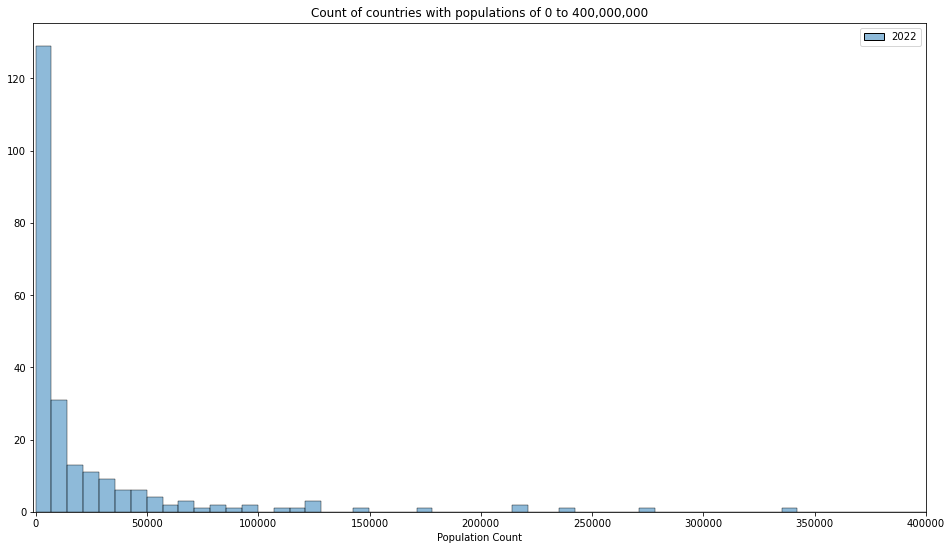

In [108]:
plt.figure(figsize=(16,9))
sns.histplot(world[['Name', '2022']])
plt.ticklabel_format(style='plain')
plt.xlabel('Population Count')
plt.ylabel('')
plt.xlim(-1000,400000)
plt.title('Count of countries with populations of 0 to 400,000,000')
plt.show()

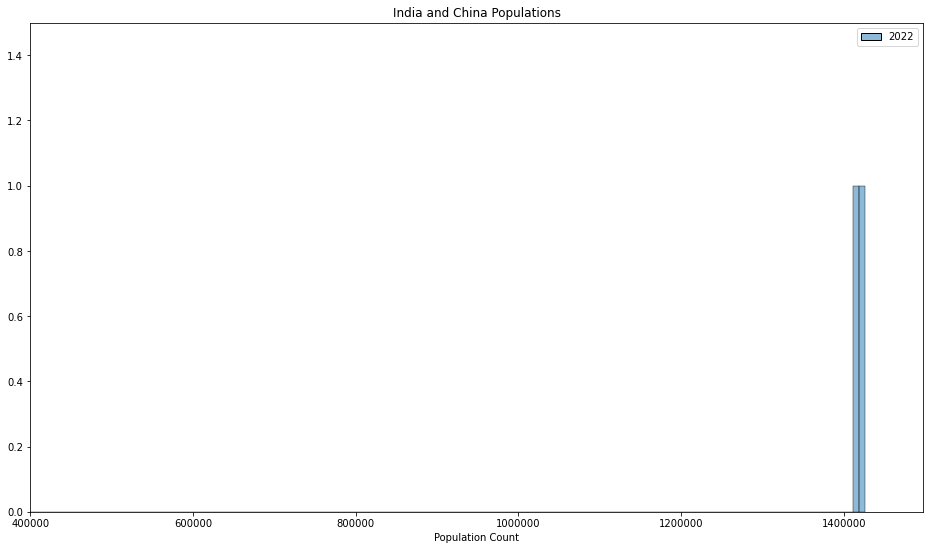

In [109]:
plt.figure(figsize=(16,9))
sns.histplot(world[['Name', '2022']])
plt.ticklabel_format(style='plain')
plt.xlabel('Population Count')
plt.ylabel('')
plt.xlim(400000,)
plt.ylim(0,1.5)
plt.title('India and China Populations')
plt.show()

In [110]:
w = world.iloc[:1][['Name','2022', '2020','2015','2010','2000','1990','1980','1970']]
w

,Name,2022,2020,2015,2010,2000,1990,1980,1970
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534


plt.figure(figsize=(16,9))
sns.histplot(data=world, x=world.index, y='2022')
plt.ticklabel_format(style='plain')
plt.xlabel('Population Count')
plt.ylabel('')
plt.xlim()
plt.ylim()
plt.title('India and China Populations')
plt.show()

In [111]:
world.iloc[:1].values

array([['China', 1425887, 1424930, 1393715, 1348191, 1264099, 1153704,
        982372, 822534, 9706961, 146.8933, 1.0, '17.88%', 1]],
      dtype=object)

In [112]:
world.loc[:0][['Name','2022', '2020','2015','2010','2000','1990','1980','1970']]

,Name,2022,2020,2015,2010,2000,1990,1980,1970
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534


In [113]:
#sns.lineplot(world.loc[:0][['Name','2022', '2020','2015','2010','2000','1990','1980','1970']], x=world.loc[:0][['2022', '2020','2015','2010','2000','1990','1980','1970']], y=world.loc[:0][['2022', '2020','2015','2010','2000','1990','1980','1970']].values)

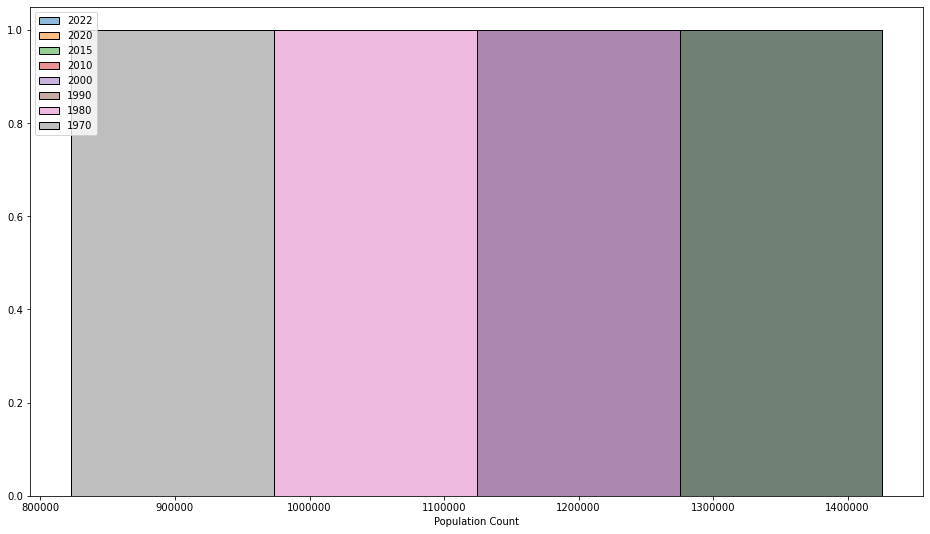

In [114]:
plt.figure(figsize=(16,9))
sns.histplot(world.iloc[:1][['Name','2022', '2020','2015','2010','2000','1990','1980','1970']])
plt.ticklabel_format(style='plain')
plt.xlabel('Population Count')
plt.ylabel('')
#plt.xlim(400000,)
#plt.ylim(0,5)
plt.title('')
plt.show()

In [115]:
world.head()

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


In [116]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         234 non-null    object 
 1   2022                         234 non-null    int64  
 2   2020                         234 non-null    int64  
 3   2015                         234 non-null    int64  
 4   2010                         234 non-null    int64  
 5   2000                         234 non-null    int64  
 6   1990                         234 non-null    int64  
 7   1980                         234 non-null    int64  
 8   1970                         234 non-null    int64  
 9   Area (km²)                   234 non-null    int64  
 10  Density (per km²)            234 non-null    float64
 11  GrowthRate                   234 non-null    float64
 12  World Population Percentage  234 non-null    object 
 13  Rank                

In [181]:
world.drop(columns={'World Population Percentage'}).head()

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,Rank
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,1
1,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,2
2,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,3
3,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,4
4,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,5


In [118]:
world['2022'].sum()

7973413

<AxesSubplot:xlabel='Name', ylabel='2022'>

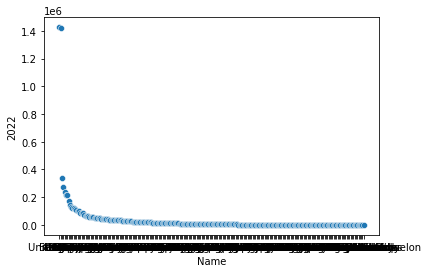

In [119]:
sns.scatterplot(data=world, x=world['Name'], y=world['2022'])

In [120]:
wd = {'2022': [world['2022'].sum()], '2020': [world['2020'].sum()], '2015': [world['2015'].sum()], '2010': [world['2010'].sum()],
      '2000': [world['2000'].sum()], '1990': [world['1990'].sum()], '1980': [world['1980'].sum()], '1970': [world['1970'].sum()],
     }

In [121]:
pd.DataFrame(data=wd)

,2022,2020,2015,2010,2000,1990,1980,1970
0,7973413,7839255,7424808,6983783,6147055,5314196,4442407,3694129


In [122]:
world.head(3)

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3


In [123]:
world.columns

Index(['Name', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970',
       'Area (km²)', 'Density (per km²)', 'GrowthRate',
       'World Population Percentage', 'Rank'],
      dtype='object')

In [124]:
c = pd.pivot_table(world.drop(columns={'Area (km²)', 'Density (per km²)', 'GrowthRate',
       'World Population Percentage', 'Rank'}), index=['Name'])
c

,1970,1980,1990,2000,2010,2015,2020,2022
Name,,,,,,,,
Afghanistan,10753,12487,10695,19543,28190,33753,38972,41129
Albania,2325,2942,3295,3182,2913,2882,2867,2842
Algeria,13796,18739,25518,30775,35856,39543,43452,44903
American Samoa,27,33,48,58,55,51,46,44
Andorra,20,36,54,66,72,72,78,80
...,...,...,...,...,...,...,...,...
Wallis and Futuna,9,11,13,15,13,12,12,12
Western Sahara,76,117,179,270,413,492,556,576
Yemen,6844,9205,13375,18629,24744,28517,32284,33697


In [125]:
c = c.T

In [126]:
c = c.reset_index()

In [127]:
c

Name,index,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,1970,10753,2325,13796,27,20,6030,6,65,23843,...,12011,87,1,11355,41929,9,76,6844,4282,5203
1,1980,12487,2942,18739,33,36,8330,7,65,28025,...,15947,118,1,15210,52968,11,117,9205,5720,7050
2,1990,10695,3295,25518,48,54,11829,8,63,32638,...,20579,151,1,19751,66913,13,179,13375,7686,10114
3,2000,19543,3182,30775,58,66,16394,11,75,37071,...,24926,192,1,24428,79001,15,270,18629,9891,11835
4,2010,28190,2913,35856,55,72,23364,13,86,41100,...,28614,245,1,28715,87411,13,413,24744,13792,12840
5,2015,33753,2882,39543,51,72,28128,15,90,43257,...,30949,276,1,30530,92191,12,492,28517,16248,14155
6,2020,38972,2867,43452,46,78,33428,16,93,45036,...,33527,312,1,28490,96649,12,556,32284,18928,15670
7,2022,41129,2842,44903,44,80,35589,16,94,45510,...,34628,327,1,28302,98187,12,576,33697,20018,16321


In [128]:
c.rename(columns={'index':'year'}, inplace=True)

In [129]:
c

Name,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,1970,10753,2325,13796,27,20,6030,6,65,23843,...,12011,87,1,11355,41929,9,76,6844,4282,5203
1,1980,12487,2942,18739,33,36,8330,7,65,28025,...,15947,118,1,15210,52968,11,117,9205,5720,7050
2,1990,10695,3295,25518,48,54,11829,8,63,32638,...,20579,151,1,19751,66913,13,179,13375,7686,10114
3,2000,19543,3182,30775,58,66,16394,11,75,37071,...,24926,192,1,24428,79001,15,270,18629,9891,11835
4,2010,28190,2913,35856,55,72,23364,13,86,41100,...,28614,245,1,28715,87411,13,413,24744,13792,12840
5,2015,33753,2882,39543,51,72,28128,15,90,43257,...,30949,276,1,30530,92191,12,492,28517,16248,14155
6,2020,38972,2867,43452,46,78,33428,16,93,45036,...,33527,312,1,28490,96649,12,556,32284,18928,15670
7,2022,41129,2842,44903,44,80,35589,16,94,45510,...,34628,327,1,28302,98187,12,576,33697,20018,16321


In [130]:
c.columns

Index(['year', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Name', length=235)

In [131]:
c.drop(columns='year').loc[:].T

,0,1,2,3,4,5,6,7
Name,,,,,,,,
Afghanistan,10753,12487,10695,19543,28190,33753,38972,41129
Albania,2325,2942,3295,3182,2913,2882,2867,2842
Algeria,13796,18739,25518,30775,35856,39543,43452,44903
American Samoa,27,33,48,58,55,51,46,44
Andorra,20,36,54,66,72,72,78,80
...,...,...,...,...,...,...,...,...
Wallis and Futuna,9,11,13,15,13,12,12,12
Western Sahara,76,117,179,270,413,492,556,576
Yemen,6844,9205,13375,18629,24744,28517,32284,33697


In [132]:
c['total'] = c.drop(columns='year').loc[:].T.sum()

In [133]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 236 entries, year to total
dtypes: int64(235), object(1)
memory usage: 14.9+ KB


In [134]:
c

Name,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,total
0,1970,10753,2325,13796,27,20,6030,6,65,23843,...,87,1,11355,41929,9,76,6844,4282,5203,3694129
1,1980,12487,2942,18739,33,36,8330,7,65,28025,...,118,1,15210,52968,11,117,9205,5720,7050,4442407
2,1990,10695,3295,25518,48,54,11829,8,63,32638,...,151,1,19751,66913,13,179,13375,7686,10114,5314196
3,2000,19543,3182,30775,58,66,16394,11,75,37071,...,192,1,24428,79001,15,270,18629,9891,11835,6147055
4,2010,28190,2913,35856,55,72,23364,13,86,41100,...,245,1,28715,87411,13,413,24744,13792,12840,6983783
5,2015,33753,2882,39543,51,72,28128,15,90,43257,...,276,1,30530,92191,12,492,28517,16248,14155,7424808
6,2020,38972,2867,43452,46,78,33428,16,93,45036,...,312,1,28490,96649,12,556,32284,18928,15670,7839255
7,2022,41129,2842,44903,44,80,35589,16,94,45510,...,327,1,28302,98187,12,576,33697,20018,16321,7973413


In [135]:
bam.head(10)

,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
0,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682,3.39,80.90,3.93,0.54
1,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444,3.76,79.11,4.43,0.68
2,Slovenia,2023,7.43,12.41,0.31,-0.498,-0.467,3.73,79.26,4.39,0.67
3,Slovenia,2024,7.35,12.55,0.31,-0.520,-0.489,3.70,79.40,4.35,0.65
4,Slovenia,2025,7.30,12.68,0.30,-0.538,-0.508,3.67,79.55,4.31,0.64
5,Slovenia,2026,7.26,12.84,0.30,-0.558,-0.529,3.64,79.68,4.26,0.63
6,Slovenia,2027,7.24,13.00,0.29,-0.576,-0.547,3.61,79.81,4.23,0.63
7,Slovenia,2028,7.23,13.16,0.28,-0.593,-0.565,3.58,79.94,4.19,0.61
8,Slovenia,2029,7.25,13.33,0.28,-0.608,-0.581,3.56,80.08,4.15,0.60
9,Slovenia,2030,7.27,13.50,0.27,-0.623,-0.596,3.53,80.21,4.12,0.60


pd.DataFrame(bam.groupby('country_name')

In [136]:
bam.isnull().sum()

country_name             0
year                     0
crude_birth_rate         0
crude_death_rate         0
net_migration            0
rate_natural_increase    0
growth_rate              0
infant_mortality         0
life_expectancy          0
mortality_rate_under5    0
mortality_rate_1to4      0
dtype: int64

for val in bam.country_name:
    print(bam[bam.country_name == val])

In [137]:
pd.pivot_table(bam, index='year', columns='country_name')

crude_birth_rate                                                \
country_name      Afghanistan Albania Algeria American Samoa Andorra Angola   
year                                                                          
1950                      NaN     NaN     NaN            NaN     NaN    NaN   
1951                      NaN     NaN     NaN            NaN     NaN    NaN   
1952                      NaN     NaN     NaN            NaN     NaN    NaN   
1953                      NaN     NaN     NaN            NaN     NaN    NaN   
1954                      NaN     NaN     NaN            NaN     NaN    NaN   
...                       ...     ...     ...            ...     ...    ...   
2046                    23.56    8.87   13.88          12.33    7.27  27.97   
2047                    23.27    8.95   13.70          12.39    7.19  27.67   
2048                    22.96    9.02   13.49          12.39    7.13  27.36   
2049                    22.63    9.06   13.26          12.35    7.10  27.04   
2050                    22.29    9.08   13.01          12.29    7.08  26.72   

                                                             ...  \
country_name Anguilla Antigua and Barbuda Argentina Armenia  ...   
year                                                         ...   
1950              NaN                 NaN       NaN     NaN  ...   
1951              NaN                 NaN       NaN     NaN  ...   
1952              NaN                 NaN       NaN     NaN  ...   
1953              NaN                 NaN       NaN     NaN  ...   
1954              NaN                 NaN       NaN     NaN  ...   
...               ...                 ...       ...     ...  ...   
2046            10.47               11.51     12.48    8.72  ...   
2047            10.44               11.43     12.37    8.64  ...   
2048            10.42               11.37     12.25    8.56  ...   
2049            10.40               11.30     12.12    8.48  ...   
2050            10.38               11.23     12.00    8.40  ...   

             rate_natural_increase                                 \
country_name             Venezuela Vietnam Virgin Islands British   
year                                                                
1950                           NaN     NaN                    NaN   
1951                           NaN     NaN                    NaN   
1952                           NaN     NaN                    NaN   
1953                           NaN     NaN                    NaN   
1954                           NaN     NaN                    NaN   
...                            ...     ...                    ...   
2046                         0.456   0.121                  0.229   
2047                         0.429   0.097                  0.226   
2048                         0.403   0.072                  0.225   
2049                         0.376   0.048                  0.224   
2050                         0.350   0.024                  0.222   

                                                                             \
country_name Virgin Islands U.S. Wallis and Futuna West Bank Western Sahara   
year                                                                          
1950                         NaN               NaN       NaN            NaN   
1951                         NaN               NaN       NaN            NaN   
1952                         NaN               NaN       NaN            NaN   
1953                         NaN               NaN       NaN            NaN   
1954                         NaN               NaN       NaN            NaN   
...                          ...               ...       ...            ...   
2046                      -1.331            -0.152     1.209          1.310   
2047                      -1.353            -0.165     1.183          1.286   
2048                      -1.373            -0.185     1.156          1.263   
2049                      -1.390      

In [138]:
z = bam[bam.year < 2022]
z.sort_values(by=['country_name', 'year'], inplace=True)
z

,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
1518,Afghanistan,1979,48.09,24.31,-32.14,2.378,-0.836,191.45,38.77,286.12,117.08
1492,Afghanistan,1980,47.10,24.34,-82.09,2.276,-5.933,191.19,38.81,285.64,116.78
1517,Afghanistan,1981,46.15,24.10,-156.85,2.205,-13.480,190.94,38.85,285.29,116.61
1516,Afghanistan,1982,45.16,24.12,-48.34,2.104,-2.729,190.69,38.88,285.03,116.57
1515,Afghanistan,1983,46.50,23.91,-18.05,2.259,0.454,190.43,38.90,284.91,116.71
...,...,...,...,...,...,...,...,...,...,...,...
2427,Zimbabwe,2017,31.41,9.73,0.00,2.168,2.168,25.80,58.56,38.03,12.55
2426,Zimbabwe,2018,30.92,9.68,0.00,2.124,2.124,25.65,58.95,37.80,12.47
2425,Zimbabwe,2019,30.40,9.70,0.00,2.070,2.070,25.47,59.17,37.61,12.45
2424,Zimbabwe,2020,29.86,9.77,0.00,2.009,2.009,25.25,59.26,37.40,12.46


In [139]:
z.year.value_counts()

2015    228
2021    228
2019    228
2018    228
2017    228
       ... 
1954      3
1953      3
1952      2
1950      2
1951      2
Name: year, Length: 72, dtype: int64

z.country_name == 'Afghanistan'

In [140]:
z[z.year==1955]

,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
4579,Bhutan,1955,46.79,20.94,0.00,2.585,2.586,168.18,43.76,282.14,137.00
11894,Djibouti,1955,42.76,20.92,5.00,2.184,2.684,165.13,42.68,245.33,96.06
13921,Guinea,1955,49.50,33.37,-0.66,1.613,1.547,224.67,30.74,373.34,191.75
7944,Nigeria,1955,49.04,21.32,1.11,2.772,2.883,142.98,42.71,243.98,117.85


In [176]:
(z.groupby('country_name').mean())

,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
country_name,,,,,,,,,,
Afghanistan,2000.0,45.402326,18.743256,-6.010930,2.665907,2.064953,147.819070,45.509070,220.091860,85.466744
Albania,2005.0,16.360303,6.116364,-11.004545,1.024394,-0.076091,24.519091,75.321818,29.956667,5.640000
Algeria,2004.0,24.068000,4.723143,-0.782571,1.934486,1.856171,32.230286,73.411714,36.696286,4.628571
American Samoa,2010.5,24.426818,4.583636,-23.241818,1.984318,-0.339818,9.611364,74.201364,12.285000,2.700909
Andorra,2005.5,10.152188,5.946875,11.892188,0.420531,1.609656,4.414375,81.663750,5.486562,1.075625
...,...,...,...,...,...,...,...,...,...,...
West Bank,2009.0,29.492400,3.902000,-5.294400,2.559040,2.029480,17.660000,73.727600,20.832400,3.231600
Western Sahara,1995.5,38.918654,15.035385,15.270577,2.388327,3.915327,86.792692,51.957115,150.711346,71.070000
Yemen,2007.5,35.943571,8.133571,-0.139643,2.781000,2.766929,61.320357,62.386786,82.699643,22.875357


In [142]:
(z.groupby('country_name').mean()).drop(columns='year').iloc[:1]

,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
country_name,,,,,,,,,
Afghanistan,45.402326,18.743256,-6.01093,2.665907,2.064953,147.81907,45.50907,220.09186,85.466744


In [143]:
(z.groupby('country_name').mean()).T

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
year,2000.000000,2005.000000,2004.000000,2010.500000,2005.500000,1995.500000,2002.500000,2006.000000,2000.500000,2005.000000,...,2005.500000,2005.000000,2006.000000,2010.500000,2008.500000,2009.00000,1995.500000,2007.500000,2000.500000,2001.500000
crude_birth_rate,45.402326,16.360303,24.068000,24.426818,10.152188,46.005385,15.785263,18.525484,19.465000,15.240606,...,22.750312,19.786364,12.706452,11.784091,15.557308,29.49240,38.918654,35.943571,44.105714,34.087750
crude_death_rate,18.743256,6.116364,4.723143,4.583636,5.946875,18.652885,5.782895,6.417419,7.727857,8.527879,...,5.107812,6.316970,4.673548,7.582727,4.760000,3.90200,15.035385,8.133571,15.400000,13.697000
net_migration,-6.010930,-11.004545,-0.782571,-23.241818,11.892188,0.421346,17.436579,2.530323,-0.005000,-10.845758,...,-1.392813,-0.525152,20.575161,-8.482727,-5.974615,-5.29440,15.270577,-0.139643,-0.060000,-0.958250
rate_natural_increase,2.665907,1.024394,1.934486,1.984318,0.420531,2.735250,1.000237,1.210806,1.173714,0.671273,...,1.764250,1.346939,0.803290,0.420136,1.079731,2.55904,2.388327,2.781000,2.870571,2.039075
growth_rate,2.064953,-0.076091,1.856171,-0.339818,1.609656,2.777577,2.743974,1.463871,1.173286,-0.412970,...,1.625031,1.294667,2.860742,-0.428091,0.482346,2.02948,3.915327,2.766929,2.864452,1.943175
infant_mortality,147.819070,24.519091,32.230286,9.611364,4.414375,125.426154,7.597895,17.627419,18.271429,19.712424,...,18.946875,26.302727,16.119355,7.427273,5.075385,17.66000,86.792692,61.320357,83.069762,43.514500
life_expectancy,45.509070,75.321818,73.411714,74.201364,81.663750,46.369615,78.187105,74.369677,74.354048,72.383333,...,73.573125,70.596970,77.411935,79.196818,78.193846,73.72760,51.957115,62.386786,48.417619,51.494500
mortality_rate_under5,220.091860,29.956667,36.696286,12.285000,5.486562,208.821538,9.324737,21.266774,21.164762,22.360000,...,22.274687,37.044545,17.408387,8.263182,5.662308,20.83240,150.711346,82.699643,147.045238,66.916500
mortality_rate_1to4,85.466744,5.640000,4.628571,2.700909,1.075625,96.876346,1.745526,3.709355,2.956190,2.709394,...,3.401875,11.068485,1.310000,0.842727,0.587692,3.23160,71.070000,22.875357,70.001667,24.569750


In [163]:
(z.drop(columns='year')).groupby('country_name').mean()

,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
country_name,,,,,,,,,
Afghanistan,45.402326,18.743256,-6.010930,2.665907,2.064953,147.819070,45.509070,220.091860,85.466744
Albania,16.360303,6.116364,-11.004545,1.024394,-0.076091,24.519091,75.321818,29.956667,5.640000
Algeria,24.068000,4.723143,-0.782571,1.934486,1.856171,32.230286,73.411714,36.696286,4.628571
American Samoa,24.426818,4.583636,-23.241818,1.984318,-0.339818,9.611364,74.201364,12.285000,2.700909
Andorra,10.152188,5.946875,11.892188,0.420531,1.609656,4.414375,81.663750,5.486562,1.075625
...,...,...,...,...,...,...,...,...,...
West Bank,29.492400,3.902000,-5.294400,2.559040,2.029480,17.660000,73.727600,20.832400,3.231600
Western Sahara,38.918654,15.035385,15.270577,2.388327,3.915327,86.792692,51.957115,150.711346,71.070000
Yemen,35.943571,8.133571,-0.139643,2.781000,2.766929,61.320357,62.386786,82.699643,22.875357


In [171]:
z.year

1518    1979
1492    1980
1517    1981
1516    1982
1515    1983
        ... 
2427    2017
2426    2018
2425    2019
2424    2020
2423    2021
Name: year, Length: 8494, dtype: int64

In [164]:
z[z.year==1950]

,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,infant_mortality,life_expectancy,mortality_rate_under5,mortality_rate_1to4
4583,Bhutan,1950,46.60,21.17,0.0,2.543,2.544,168.18,43.76,282.14,137.00
11898,Djibouti,1950,42.87,22.27,5.0,2.060,2.559,175.66,40.98,263.49,106.55


---

In [144]:
g.columns

MultiIndex([(2010, 'Female'),
            (2010,   'Male'),
            (2011, 'Female'),
            (2011,   'Male'),
            (2012, 'Female'),
            (2012,   'Male'),
            (2013, 'Female'),
            (2013,   'Male'),
            (2014, 'Female'),
            (2014,   'Male'),
            (2015, 'Female'),
            (2015,   'Male'),
            (2016, 'Female'),
            (2016,   'Male'),
            (2017, 'Female'),
            (2017,   'Male'),
            (2018, 'Female'),
            (2018,   'Male'),
            (2019, 'Female'),
            (2019,   'Male'),
            (2020, 'Female'),
            (2020,   'Male'),
            (2021, 'Female'),
            (2021,   'Male'),
            (2022, 'Female'),
            (2022,   'Male'),
            (2023, 'Female'),
            (2023,   'Male'),
            (2024, 'Female'),
            (2024,   'Male'),
            (2025, 'Female'),
            (2025,   'Male'),
            (2026, 'Female'),
          

In [145]:
g.loc[:][[(2010, 'Female'),
            (2010,   'Male')]]

year                2010          
sex               Female      Male
country_name                      
Afghanistan     14040537  14479174
Albania          1477193   1447568
Algeria         17409564  17824289
American Samoa     27037     27356
Andorra            40468     43351
...                  ...       ...
West Bank        1155964   1196392
Western Sahara    242961    238857
Yemen           11207435  11514977
Zambia           6398037   6390702
Zimbabwe         5983060   5435215

[228 rows x 2 columns]

In [146]:
#g['2010']
g.loc[:][[(2010, 'Female')]]# + g.loc[:][[(2010, 'Male')]]

year,2010
sex,Female
country_name,
Afghanistan,14040537
Albania,1477193
Algeria,17409564
American Samoa,27037
Andorra,40468
...,...
West Bank,1155964
Western Sahara,242961


---

In [147]:
fp

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1950-01-01,8150368,1227156,8892718,19100,6176,4117617,5219,45816,17150336,1355269,...,5009006,25348144,6243,26900,6962,771165,9057,4777089,2553000,2853151
1951-01-01,8284473,1254119,9073304,19500,6310,4173095,5261,46901,17517342,1379204,...,5217020,25793577,6245,27700,7050,774512,10133,4869125,2611000,2950941
1952-01-01,8425333,1282697,9279525,19300,5866,4232095,5303,47961,17876956,1416722,...,5439568,26246839,6304,27900,7138,777872,11336,4963829,2672000,3080907
1953-01-01,8573217,1314608,9531710,19200,5591,4293840,5345,48976,18230816,1455777,...,5674259,26724094,6398,26900,7228,781247,12682,5061153,2734000,3190967
1954-01-01,8728408,1352982,9611093,19500,5503,4357527,5387,49967,18580559,1505668,...,5918702,27210027,6496,27200,7319,784637,14187,5162494,2800000,3307273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046-01-01,60165568,2894917,54237145,49384,77686,42180459,25984,120990,53356869,2566094,...,39266094,110860296,56782,73004,15735,4071177,1103223,44199728,35368942,23829993
2047-01-01,61075545,2877563,54565705,49332,76998,43092389,26239,121508,53560693,2542324,...,39403764,110977307,57491,71952,15701,4107818,1120822,44682648,36255336,24170434
2048-01-01,61985148,2859983,54877585,49303,76280,44014878,26490,122004,53755439,2518074,...,39531525,111068418,58200,70922,15668,4143794,1138386,45157387,37155040,24512164


In [148]:
#c['total'] = c.drop(columns='year').loc[:].T.sum()
fp['total_population'] = fp.T.sum()

In [149]:
fp

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe,total_population
year,,,,,,,,,,,,,,,,,,,,,
1950-01-01,8150368,1227156,8892718,19100,6176,4117617,5219,45816,17150336,1355269,...,25348144,6243,26900,6962,771165,9057,4777089,2553000,2853151,2557628654
1951-01-01,8284473,1254119,9073304,19500,6310,4173095,5261,46901,17517342,1379204,...,25793577,6245,27700,7050,774512,10133,4869125,2611000,2950941,2594939877
1952-01-01,8425333,1282697,9279525,19300,5866,4232095,5303,47961,17876956,1416722,...,26246839,6304,27900,7138,777872,11336,4963829,2672000,3080907,2636772306
1953-01-01,8573217,1314608,9531710,19200,5591,4293840,5345,48976,18230816,1455777,...,26724094,6398,26900,7228,781247,12682,5061153,2734000,3190967,2682053389
1954-01-01,8728408,1352982,9611093,19500,5503,4357527,5387,49967,18580559,1505668,...,27210027,6496,27200,7319,784637,14187,5162494,2800000,3307273,2730228104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046-01-01,60165568,2894917,54237145,49384,77686,42180459,25984,120990,53356869,2566094,...,110860296,56782,73004,15735,4071177,1103223,44199728,35368942,23829993,9196222125
2047-01-01,61075545,2877563,54565705,49332,76998,43092389,26239,121508,53560693,2542324,...,110977307,57491,71952,15701,4107818,1120822,44682648,36255336,24170434,9242432619
2048-01-01,61985148,2859983,54877585,49303,76280,44014878,26490,122004,53755439,2518074,...,111068418,58200,70922,15668,4143794,1138386,45157387,37155040,24512164,9287570800


In [150]:
len(fp)

101

In [151]:
print(len(fp) * 0.5)
print(len(fp) * 0.3)
print(len(fp) * 0.2)

50.5
30.299999999999997
20.200000000000003


In [152]:
fp[:50].head()
fp[:50].tail()

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe,total_population
year,,,,,,,,,,,,,,,,,,,,,
1995-01-01,19445013,3158154,28321697,53906,63245,10999585,9845,68710,35273867,3130255,...,73783390,19059,107817,14017,1620916,263874,14831575,8690098,11159492,5695452840
1996-01-01,20110508,3203599,28837598,54959,63358,11337007,10138,70055,35682983,3120068,...,74946552,19740,108093,14118,1720818,277669,15283816,8915420,11316947,5775829645
1997-01-01,20769357,3225414,29318183,55967,64053,11670042,10438,71453,36102182,3112661,...,76052857,20443,108355,14250,1814219,291835,15741184,9169242,11469387,5854339578
1998-01-01,21451549,3212771,29768857,56930,64728,12013296,10754,72781,36517941,3106213,...,77107502,21132,108535,14365,1858788,306348,16224216,9428653,11606924,5931547913
1999-01-01,22205667,3187329,30204849,57847,65073,12357509,11079,74016,36923439,3104064,...,78141672,21811,108596,14518,1903192,321175,16728304,9692594,11733078,6008279216


In [153]:
fp[50:51]

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe,total_population
year,,,,,,,,,,,,,,,,,,,,,
2000-01-01,22461349,3158352,30638018,57771,65099,12682502,11426,75351,37335675,3100042,...,79177981,22509,108639,14666,1947354,336295,17235921,9983878,11820025,6084484918


In [154]:
train = fp[:51]
validate = fp[51:(51+30)]
test = fp[(51+30):]

In [155]:
train.head()

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe,total_population
year,,,,,,,,,,,,,,,,,,,,,
1950-01-01,8150368,1227156,8892718,19100,6176,4117617,5219,45816,17150336,1355269,...,25348144,6243,26900,6962,771165,9057,4777089,2553000,2853151,2557628654
1951-01-01,8284473,1254119,9073304,19500,6310,4173095,5261,46901,17517342,1379204,...,25793577,6245,27700,7050,774512,10133,4869125,2611000,2950941,2594939877
1952-01-01,8425333,1282697,9279525,19300,5866,4232095,5303,47961,17876956,1416722,...,26246839,6304,27900,7138,777872,11336,4963829,2672000,3080907,2636772306
1953-01-01,8573217,1314608,9531710,19200,5591,4293840,5345,48976,18230816,1455777,...,26724094,6398,26900,7228,781247,12682,5061153,2734000,3190967,2682053389
1954-01-01,8728408,1352982,9611093,19500,5503,4357527,5387,49967,18580559,1505668,...,27210027,6496,27200,7319,784637,14187,5162494,2800000,3307273,2730228104


In [179]:
validate.head()

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe,total_population
year,,,,,,,,,,,,,,,,,,,,,
2001-01-01,22507460,3128002,31077277,57609,65316,12997970,11774,76734,37739190,3099474,...,80209475,23203,108386,14764,1991597,351692,17762475,10284605,11867855,6160810152
2002-01-01,23600088,3098028,31523711,57395,65986,13364900,12113,77935,38131971,3096321,...,81257964,23857,108208,14856,2036274,367389,18309989,10558408,11866017,6237266807
2003-01-01,25005388,3069665,31975415,57180,68782,13815757,12448,79066,38529402,3088904,...,82296588,24485,108085,14952,2081290,383404,18855729,10819896,11815518,6313389498
2004-01-01,25697635,3045640,32450849,57094,73247,14315255,12782,80193,38945354,3086691,...,83352452,25140,107950,15034,2126559,399736,19411357,11088247,11735046,6389906953
2005-01-01,26334702,3024533,32917567,56953,76122,14769556,13116,81277,39367281,3084080,...,84424930,25869,107863,15094,2172074,415400,20002597,11372462,11639470,6466506225


In [178]:
test.head(3)

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe,total_population
year,,,,,,,,,,,,,,,,,,,,,
2031-01-01,46570361,3097576,48561405,52263,84028,29883977,21679,110048,49356375,2866822,...,105999682,45937,89793,16084,3444140,838775,36217557,23786980,19107079,8381586688
2032-01-01,47475646,3090867,48963397,52035,83801,30624087,21991,110987,49671440,2849579,...,106496622,46688,88702,16079,3490566,856209,36775629,24453283,19396120,8442979598
2033-01-01,48382699,3082690,49355830,51799,83554,31375131,22301,111894,49979587,2831942,...,106969589,47433,87595,16070,3536362,873709,37332489,25135120,19687657,8503327331


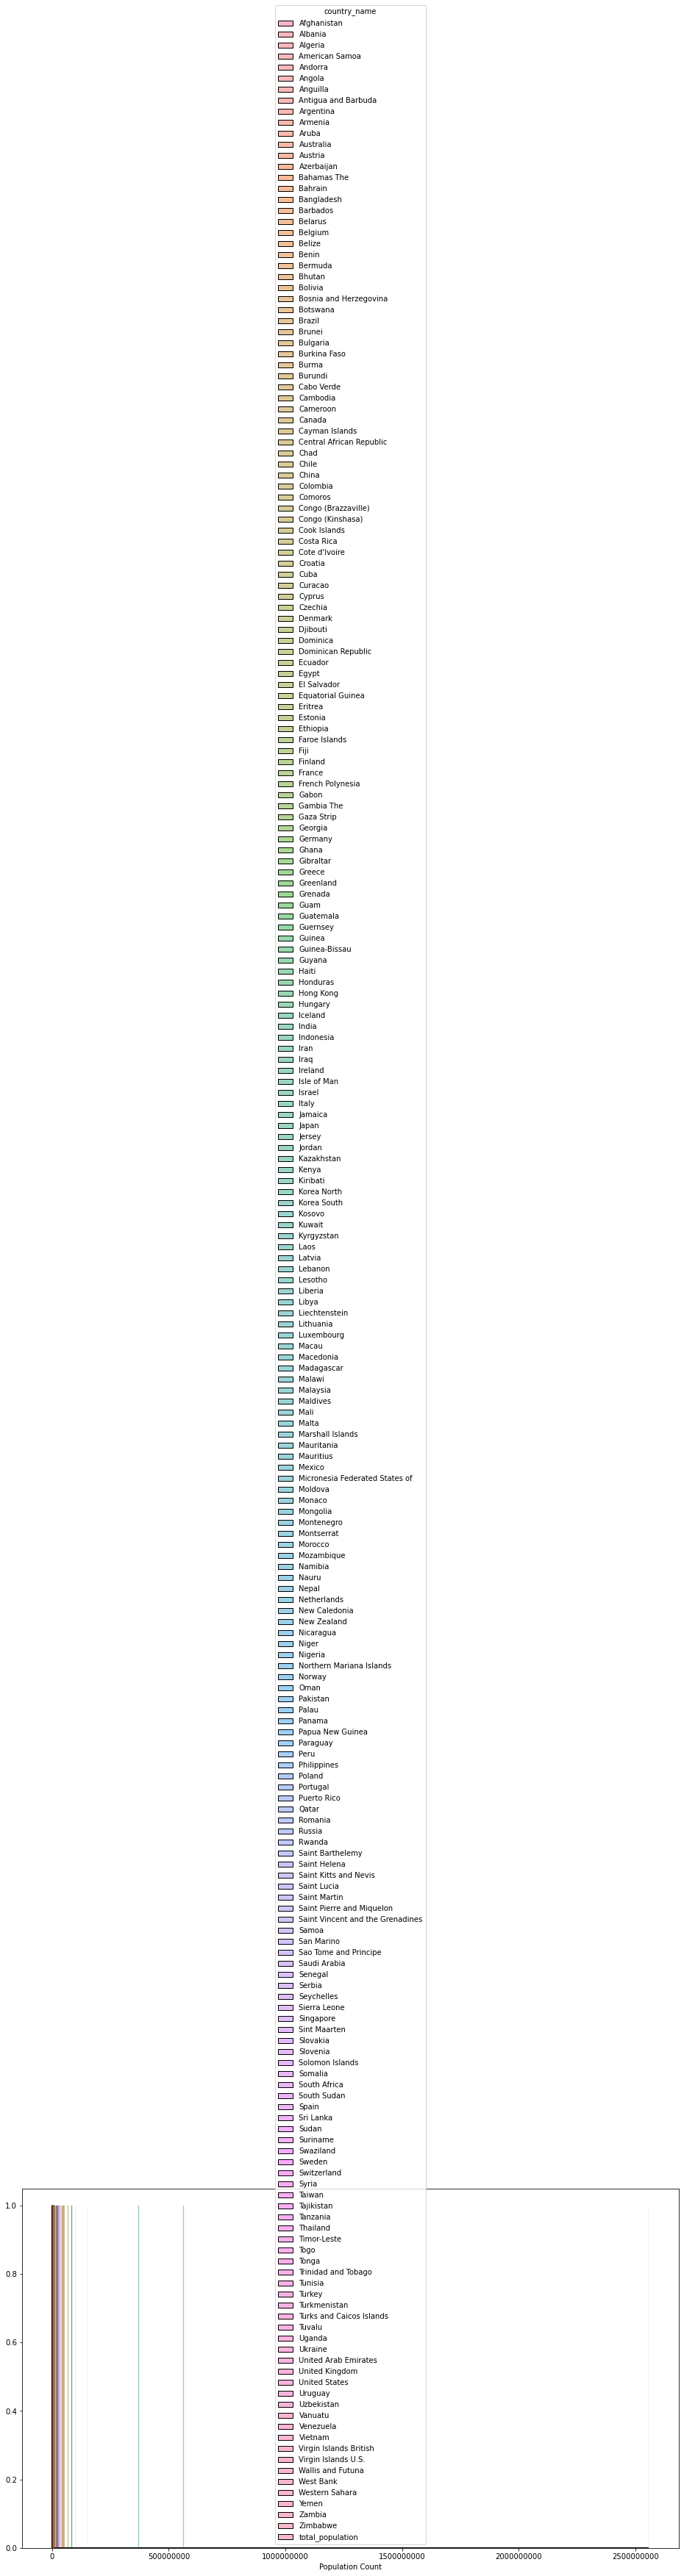

In [180]:
plt.figure(figsize=(16,9))
sns.histplot(train.iloc[:1])
plt.ticklabel_format(style='plain')
plt.xlabel('Population Count')
plt.ylabel('')
plt.xlim()
plt.title('')
plt.show()

In [174]:
mp1[mp1.year == 1950]

,country_name,year,midyear_population
75,Slovenia,1950,1467759
176,Latvia,1950,1936498
277,Mongolia,1950,778555
378,Mauritania,1950,1005595
479,Liberia,1950,823885
...,...,...,...
22598,Azerbaijan,1950,2885332
22699,Saint Pierre and Miquelon,1950,4594
22800,Northern Mariana Islands,1950,6286
22901,Chad,1950,2607769
